In [5]:
library(readr)

In [8]:
train <- read.csv("train.csv")
macro <- read.csv("macro.csv")
submission <- read.csv("submission.csv")

## Data Preprocessing

In [10]:
head(train)

id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
1,2011-08-20,43,27,4,NA,NA,NA,NA,NA,...,9,4,0,13,22,1,0,52,4,5850000
2,2011-08-23,34,19,3,NA,NA,NA,NA,NA,...,15,3,0,15,29,1,10,66,14,6000000
3,2011-08-27,43,29,2,NA,NA,NA,NA,NA,...,10,3,0,11,27,0,4,67,10,5700000
4,2011-09-01,89,50,9,NA,NA,NA,NA,NA,...,11,2,1,4,4,0,0,26,3,13100000
5,2011-09-05,77,77,4,NA,NA,NA,NA,NA,...,319,108,17,135,236,2,91,195,14,16331452
6,2011-09-06,67,46,14,NA,NA,NA,NA,NA,...,62,14,1,53,78,1,20,113,17,9100000


In [11]:
prices <- train$price_doc

In [12]:
# floor variable is integer and since it's a categorical variable:
train$floor <- as.factor(train$floor)

In [13]:
# Convert max_floor variable from character to integer
class(train$max_floor)
train$max_floor <- as.integer(train$max_floor)

[1] "integer"

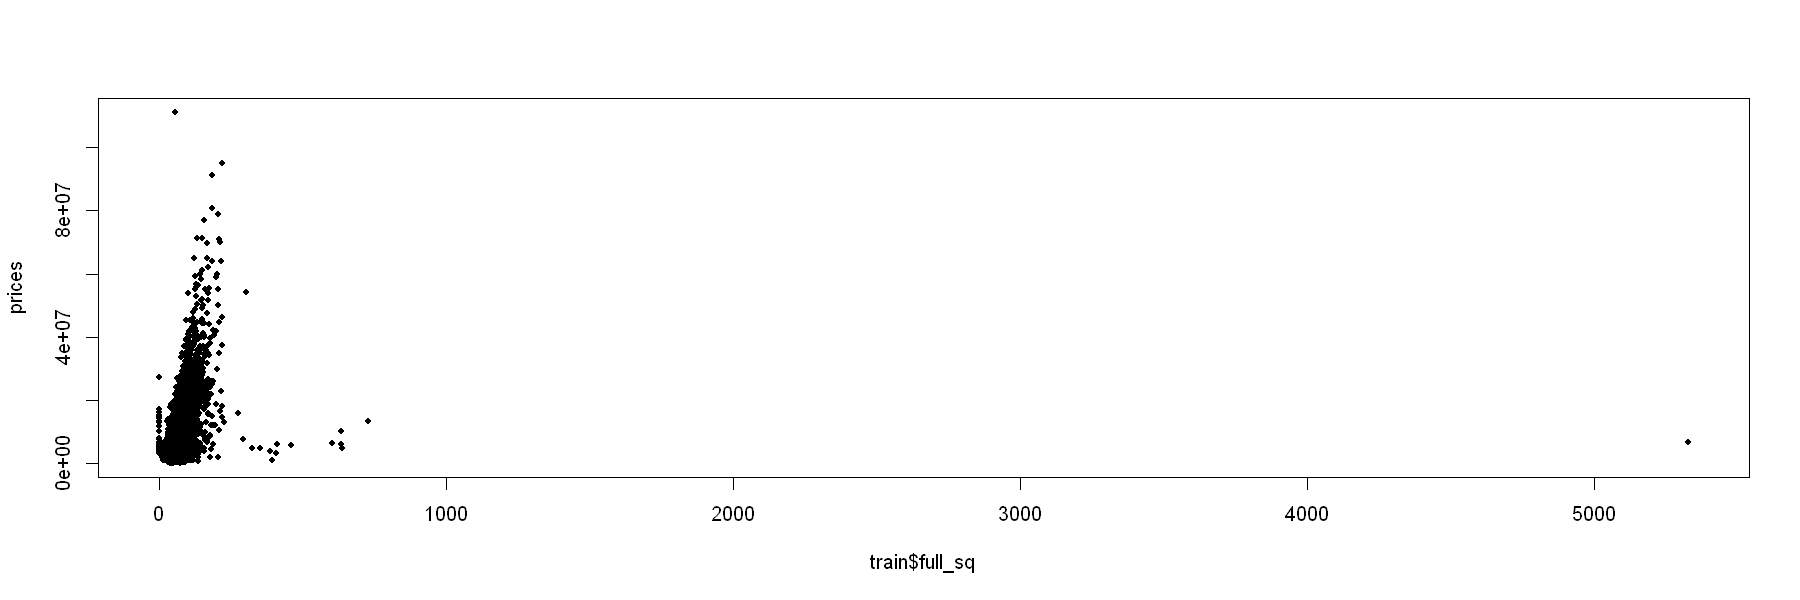

In [20]:
# Price vs Total Area
options(repr.plot.width=15, repr.plot.height=5) 
plot(train$full_sq, prices, pch = 20)

[1] 3528

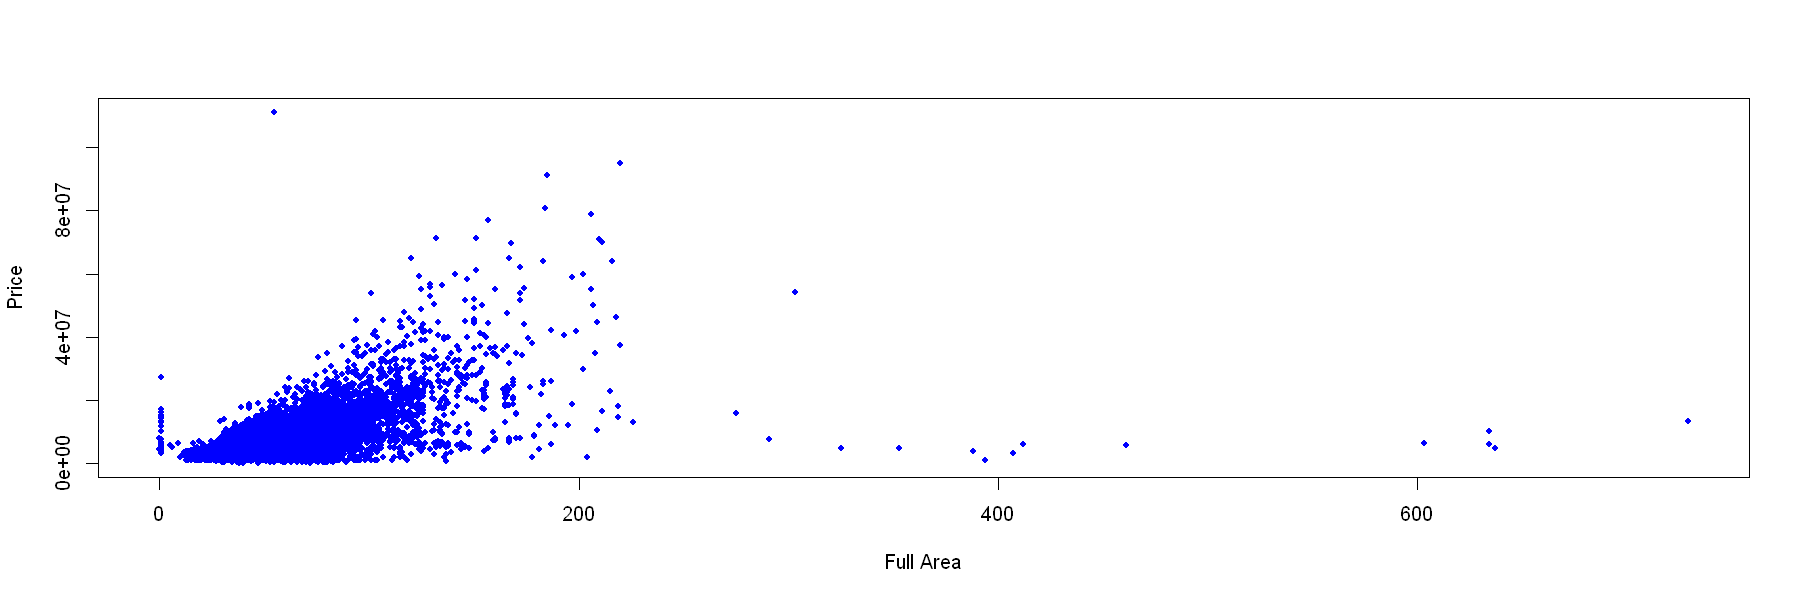

In [21]:
# remove outlier with sq ft > 5000
which(train$full_sq > 5000) # 3528
plot(train$full_sq[c(1:3527,3529:nrow(train))], 
     prices[c(1:3527,3529:nrow(train))], pch = 20,
     ylab = 'Price', xlab = 'Full Area', col = 'blue')

[1] 13547

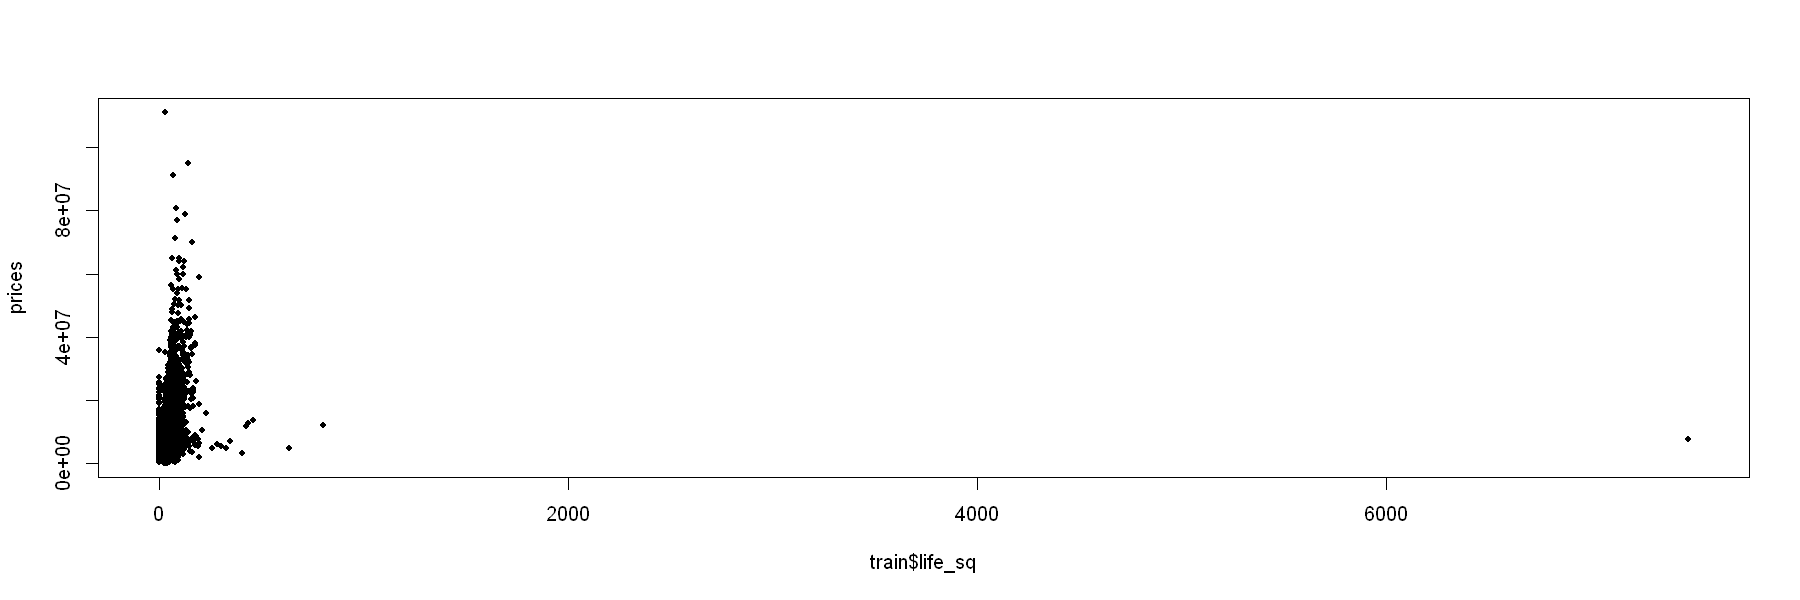

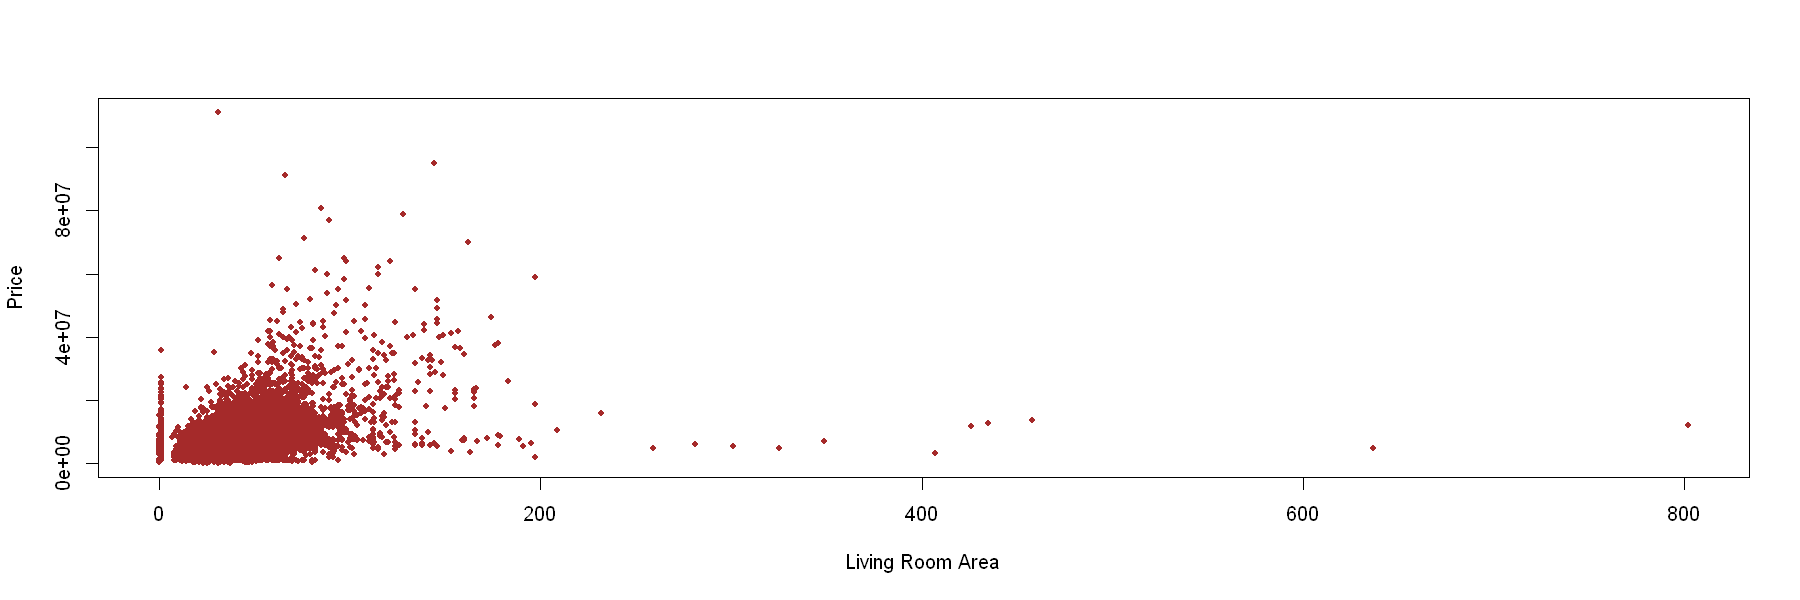

In [22]:
# remove outlier
train$full_sq[which(train$full_sq > 5000)] <- median(train$full_sq)
# Price vs Living Room Area
plot(train$life_sq, prices, pch = 20)
which(train$life_sq > 6000) # 13547
plot(train$life_sq[c(1:13546,13548:nrow(train))], 
     prices[c(1:13546,13548:nrow(train))], pch = 20,
     ylab = 'Price', xlab = 'Living Room Area', col = 'brown')
train$full_sq[which(train$life_sq > 6000)] <- median(train$full_sq)

In [23]:
# Convert 'material' from character to categorical variable
train$material <- as.factor(train$material)

In [27]:
# Convert build_year into a feature defining age of the building
train$build_year <- as.numeric(train$build_year)

### check for outliers

In [35]:
which(train$build_year > 2100) # [1] 10090 15221

[1] 10090 15221

In [32]:
train$build_year[which(train$build_year>2100)] # [1] 20052009 4965

[1] 20052009     4965

In [33]:
which(train$build_year < 1800)

[1]  9442  9621  9701  9746  9765 10123 10143 10261 10295 10330 10332 10348
 [13] 10350 10375 10398 10460 10490 10595 10628 10629 10632 10654 10664 10666
 [25] 10687 10696 10747 10758 10764 10770 10784 10793 10900 10910 10997 11008
 [37] 11019 11184 11186 11189 11192 11203 11229 11259 11261 11272 11342 11382
 [49] 11384 11398 11415 11479 11517 11532 11581 11614 11621 11626 11653 11654
 [61] 11703 11727 11728 11747 11754 11764 11766 11792 11808 11862 11928 11990
 [73] 12014 12044 12046 12062 12086 12128 12161 12177 12180 12274 12296 12306
 [85] 12313 12317 12381 12431 12441 12516 12552 12688 12697 12705 12718 12727
 [97] 12743 12796 12809 12810 12847 12904 12954 12966 13037 13082 13230 13278
[109] 13327 13335 13363 13413 13442 13501 13591 13618 13641 13655 13656 13677
[121] 13747 13778 13810 13901 13993 14059 14101 14130 14147 14237 14250 14253
[133] 14382 14449 14495 14535 14537 14548 14564 14571 14612 14622 14630 14682
[145] 14698 14705 14763 14772 14803 14891 14899 14908 14933 14987 14997 15024
[157] 15030 15080 15122 15178 15332 15349 15354 15364 15366 15382 15388 15441
[169] 15457 15474 15480 15537 15545 15577 15592 15625 15636 15663 15691 15706
[181] 15716 15723 15775 15789 15819 15849 15857 15885 15895 15899 15916 15926
[193] 15934 15986 15991 15997 16061 16069 16093 16098 16099 16116 16117 16133
[205] 16141 16166 16215 16225 16241 16251 16290 16311 16336 16369 16370 16375
[217] 16415 16422 16428 16451 16465 16521 16535 16551 16579 16653 16667 16668
[229] 16672 16739 16756 16776 16777 16781 16811 16818 16833 16836 16904 16923
[241] 16962 16975 17038 17040 17050 17051 17067 17126 17129 17156 17188 17195
[253] 17206 17250 17282 17325 17328 17331 17353 17363 17375 17384 17397 17398
[265] 17405 17425 17449 17451 17484 17572 17607 17704 17716 17748 17749 17769
[277] 17774 17862 17933 17964 18018 18033 18036 18063 18082 18124 18125 18148
[289] 18176 18177 18215 18231 18248 18257 18268 18285 18297 18301 18329 18362
[301] 18401 18409 18419 18421 18444 18457 18483 18500 18538 18541 18559 18593
[313] 18601 18634 18650 18687 18710 18732 18751 18798 18801 18835 18856 18882
[325] 18902 18909 18914 18933 18950 18964 18990 19026 19078 19098 19128 19153
[337] 19184 19211 19219 19255 19283 19294 19357 19363 19378 19389 19412 19462
[349] 19476 19480 19492 19505 19556 19594 19599 19602 19624 19646 19647 19650
[361] 19661 19669 19696 19754 19760 19800 19809 19817 19825 19839 19850 19860
[373] 19878 19888 19907 19932 19970 19976 20009 20032 20036 20040 20047 20058
[385] 20062 20093 20170 20179 20214 20264 20284 20312 20314 20315 20331 20333
[397] 20383 20387 20395 20418 20429 20431 20467 20567 20576 20579 20594 20623
[409] 20640 20646 20647 20659 20706 20741 20742 20751 20766 20795 20799 20801
[421] 20817 20820 20833 20860 20867 20918 20920 20944 20956 21011 21032 21033
[433] 21047 21060 21139 21194 21247 21259 21264 21303 21350 21351 21359 21402
[445] 21427 21447 21454 21479 21499 21507 21518 21529 21545 21571 21579 21581
[457] 21584 21588 21591 21639 21646 21651 21664 21678 21682 21709 21752 21754
[469] 21759 21765 21826 21845 21871 21873 21874 21919 21922 21927 22046 22108
[481] 22117 22144 22159 22169 22172 22175 22246 22266 22289 22314 22318 22320
[493] 22371 22427 22443 22456 22467 22501 22547 22583 22597 22685 22694 22726
[505] 22767 22783 22811 22825 22944 22973 22978 23006 23009 23044 23047 23067
[517] 23094 23108 23135 23151 23192 23228 23229 23249 23250 23255 23258 23282
[529] 23327 23396 23417 23422 23433 23446 23458 23476 23482 23486 23487 23489
[541] 23498 23508 23527 23531 23544 23547 23555 23557 23564 23574 23598 23626
[553] 23632 23633 23657 23681 23710 23727 23753 23781 23798 23804 23807 23813
[565] 23861 23884 23915 23956 23983 23989 24042 24064 24085 24092 24208 24215
[577] 24226 24232 24276 24292 24296 24297 24339 24362 24446 24483 24489 24491
[589] 24552 24557 24561 24590 24591 24601 24615 24628 24656 24786 24821 24830
[601] 24893 24902 24924 24946 25071 25124 25141 25152 25164 25223 25227 25230
[613] 25233 25275 25279 

In [34]:
train$build_year[which(train$build_year < 1800)]

[1]    0    1    1    1    1    1    0    0    0    1    0    0    0    1    1
 [16]    1    1    1    1    0    1    0    1    0    1    1    1    1    1    0
 [31]    0    1    1    1    1    0    1    0    1    1    0    0    1    1    1
 [46]    3    0    1    0    0    1    0    1    0    1    1    1    1    1    0
 [61]    0    1    1    1    0    1    1    0    1    1    1    0    1    1    1
 [76]    1    1    0    1    1    1    1    1    1    1    1    0    0    1    1
 [91]    1    1    1    0    0    1    0    1    0    0    0    1    1    1    0
[106]    0    1    1    1    1    0    0    1    1    0    0    0    1    1    1
[121]    0    1    1    1   20    1    1    1    1    1    1    0    0    0    0
[136]    1    1    1    0    1    1    0    0    1    0    1    0    1    0    1
[151]    1    0    1    0    0    0    1    1    1    1    0    1    1    0    1
[166]    0    1    0    1    1    1    0    1    1    1    1    0    1    0    0
[181]    0    1    0    1    1    1    0    0    1    1    1    1    0    1    1
[196]    0    0    1    1    1    1    1    0    1    0    0    0    1    1    0
[211]    1    1    0    0    0    0    1    0    0    1    0    0    1    1    0
[226]    0    1    1    0    1    0    1    1    1    0    1    0    1    0    1
[241]    0    1    0    0    1    1    0    1    0    0    1    1    1    0    0
[256]    0    0    0    0    1    0    1    0    1    0    0    0    1    1    1
[271]    1    1    0    1    0    1    0    0    0    1    0    1    1    1    0
[286]    0    1    0    1    0    1    1    1    1    1    0    0    0    0    0
[301]    0    1    1    0    1    1    1    0    1    1    1    1    1    0    1
[316]    0    0    0    1    1    0    0    1    1    0    1    1    1    0    1
[331]    0    1    0    1    3    1    1    0    1    1    0    1    1    0    1
[346]    1    0    0    1    0    1    0    1    1    0    0    1    1    0    0
[361]    1    1    1    0    1    1    1    0    0    1    1    1    0    0    1
[376]    1    1    1    0    1    0    0    0    1    1    0    1    1    1    1
[391]    0    1    1    0    1    0    0    1    0    0    0    0    1    1    1
[406]    1    1    0    0    1    0    1    0    0    0    1    0    1    1    1
[421]    0    0    1    1    0    0    0    1    1    0    1    0    0    1    0
[436]    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0
[451]    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0
[466]    0    0    1    1    0    0    1    1    0    0    0    0    0    0    1
[481]    0    1    0    0    1    0    0    1    0    0    0    1    1    1    1
[496]    1    0    0    0    0    0    1    1    0    0    0    0    0    1    1
[511]    1    0    0    1    0    0    0    0    1    1    0    1    1    1    0
[526]    0    0    0    0    0    1    0    0    0    1    0    0    1    1    0
[541]    1    1    0    1    1    1    0    0    0    1    1    1    1    1    0
[556]    0    0    1    0    1    0    1    0    0    0    0    0    0    0    0
[571]    1    1    0    0    1    0    0    0    0    1    0    0    0    0    0
[586]    0    0    0    0    0    1    0    0    0    0    1    0    0    0    0
[601]    1    0    0    0    1    0    1    1    0    1    0    0    0    0    0
[616]    0    0    1    0    0    1    0    1    0    0    0    1    1    1    1
[631]    1    1    0    0    1    0    1    1    1    0    0    0    1    1    0
[646]    1    0    0    0    0    0    1    1    1    1    0    0 1691    0    0
[661]    1    0    0    1    0    1    0    1    0    1    1    0    0    0    1
[676]    0    0    0    0    1    0    1    0    0    0    0    0    1    0    1
[691]    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0
[706]    0    0    0    0    1    0    0    0    0    1    0    0    0    0    1
[721]    0    1    1    0    0    0    1    0    0    0    0    0    0    0    0
[736]    0    0    0    0    0   

###  angka yang harus diubah. Replace with NA

In [40]:
train$build_year[c(10090, 15221)] <- c(NA, NA)

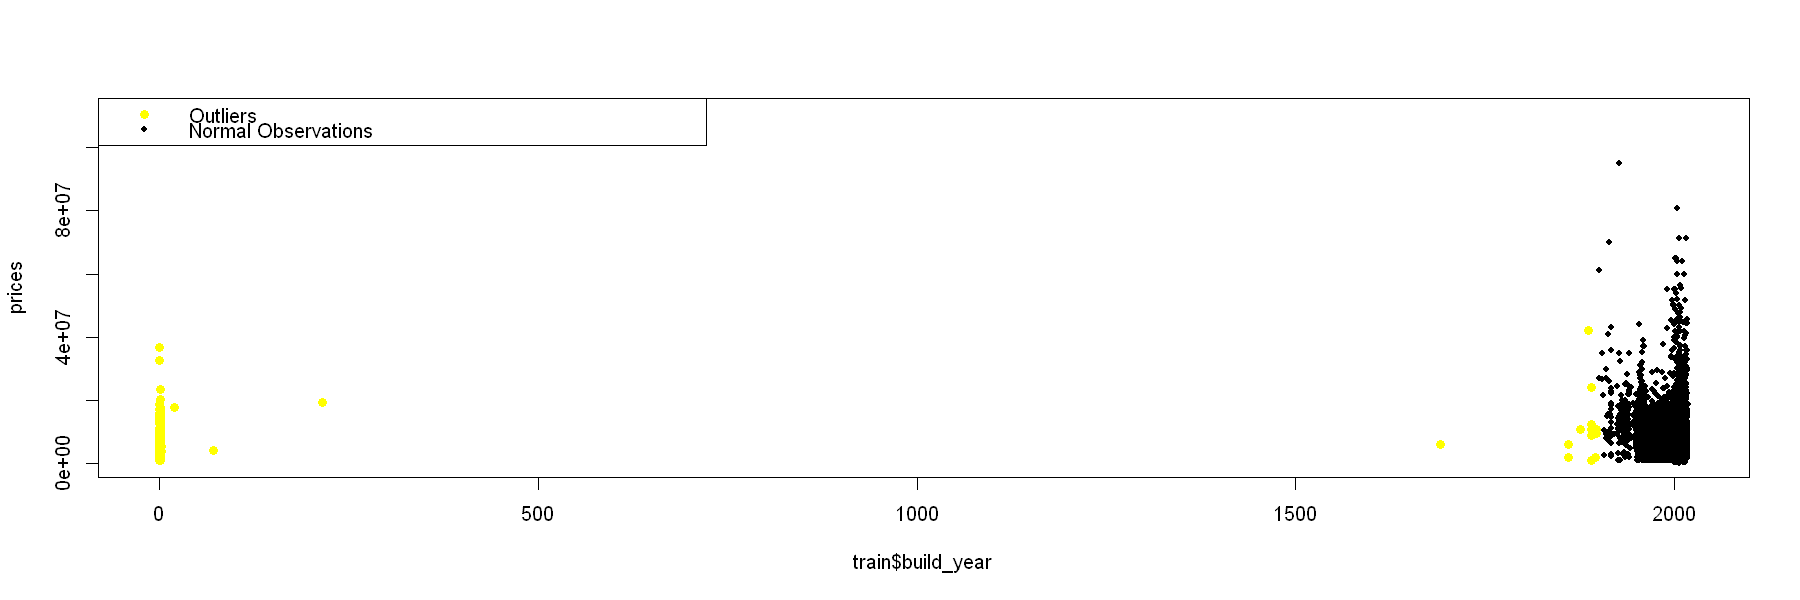

In [41]:
plot(train$build_year, prices, pch = 20)
points(train$build_year[which(train$build_year < 1900)], 
     prices[which(train$build_year < 1900)], pch = 19, col = 'yellow')
legend('topleft',col = c('yellow', 'black'), pch = c(19,20),
       legend = c('Outliers','Normal Observations'))

### buang outliers

In [44]:
which(train$build_year < 1800)

[1]  9442  9621  9701  9746  9765 10123 10143 10261 10295 10330 10332 10348
 [13] 10350 10375 10398 10460 10490 10595 10628 10629 10632 10654 10664 10666
 [25] 10687 10696 10747 10758 10764 10770 10784 10793 10900 10910 10997 11008
 [37] 11019 11184 11186 11189 11192 11203 11229 11259 11261 11272 11342 11382
 [49] 11384 11398 11415 11479 11517 11532 11581 11614 11621 11626 11653 11654
 [61] 11703 11727 11728 11747 11754 11764 11766 11792 11808 11862 11928 11990
 [73] 12014 12044 12046 12062 12086 12128 12161 12177 12180 12274 12296 12306
 [85] 12313 12317 12381 12431 12441 12516 12552 12688 12697 12705 12718 12727
 [97] 12743 12796 12809 12810 12847 12904 12954 12966 13037 13082 13230 13278
[109] 13327 13335 13363 13413 13442 13501 13591 13618 13641 13655 13656 13677
[121] 13747 13778 13810 13901 13993 14059 14101 14130 14147 14237 14250 14253
[133] 14382 14449 14495 14535 14537 14548 14564 14571 14612 14622 14630 14682
[145] 14698 14705 14763 14772 14803 14891 14899 14908 14933 14987 14997 15024
[157] 15030 15080 15122 15178 15332 15349 15354 15364 15366 15382 15388 15441
[169] 15457 15474 15480 15537 15545 15577 15592 15625 15636 15663 15691 15706
[181] 15716 15723 15775 15789 15819 15849 15857 15885 15895 15899 15916 15926
[193] 15934 15986 15991 15997 16061 16069 16093 16098 16099 16116 16117 16133
[205] 16141 16166 16215 16225 16241 16251 16290 16311 16336 16369 16370 16375
[217] 16415 16422 16428 16451 16465 16521 16535 16551 16579 16653 16667 16668
[229] 16672 16739 16756 16776 16777 16781 16811 16818 16833 16836 16904 16923
[241] 16962 16975 17038 17040 17050 17051 17067 17126 17129 17156 17188 17195
[253] 17206 17250 17282 17325 17328 17331 17353 17363 17375 17384 17397 17398
[265] 17405 17425 17449 17451 17484 17572 17607 17704 17716 17748 17749 17769
[277] 17774 17862 17933 17964 18018 18033 18036 18063 18082 18124 18125 18148
[289] 18176 18177 18215 18231 18248 18257 18268 18285 18297 18301 18329 18362
[301] 18401 18409 18419 18421 18444 18457 18483 18500 18538 18541 18559 18593
[313] 18601 18634 18650 18687 18710 18732 18751 18798 18801 18835 18856 18882
[325] 18902 18909 18914 18933 18950 18964 18990 19026 19078 19098 19128 19153
[337] 19184 19211 19219 19255 19283 19294 19357 19363 19378 19389 19412 19462
[349] 19476 19480 19492 19505 19556 19594 19599 19602 19624 19646 19647 19650
[361] 19661 19669 19696 19754 19760 19800 19809 19817 19825 19839 19850 19860
[373] 19878 19888 19907 19932 19970 19976 20009 20032 20036 20040 20047 20058
[385] 20062 20093 20170 20179 20214 20264 20284 20312 20314 20315 20331 20333
[397] 20383 20387 20395 20418 20429 20431 20467 20567 20576 20579 20594 20623
[409] 20640 20646 20647 20659 20706 20741 20742 20751 20766 20795 20799 20801
[421] 20817 20820 20833 20860 20867 20918 20920 20944 20956 21011 21032 21033
[433] 21047 21060 21139 21194 21247 21259 21264 21303 21350 21351 21359 21402
[445] 21427 21447 21454 21479 21499 21507 21518 21529 21545 21571 21579 21581
[457] 21584 21588 21591 21639 21646 21651 21664 21678 21682 21709 21752 21754
[469] 21759 21765 21826 21845 21871 21873 21874 21919 21922 21927 22046 22108
[481] 22117 22144 22159 22169 22172 22175 22246 22266 22289 22314 22318 22320
[493] 22371 22427 22443 22456 22467 22501 22547 22583 22597 22685 22694 22726
[505] 22767 22783 22811 22825 22944 22973 22978 23006 23009 23044 23047 23067
[517] 23094 23108 23135 23151 23192 23228 23229 23249 23250 23255 23258 23282
[529] 23327 23396 23417 23422 23433 23446 23458 23476 23482 23486 23487 23489
[541] 23498 23508 23527 23531 23544 23547 23555 23557 23564 23574 23598 23626
[553] 23632 23633 23657 23681 23710 23727 23753 23781 23798 23804 23807 23813
[565] 23861 23884 23915 23956 23983 23989 24042 24064 24085 24092 24208 24215
[577] 24226 24232 24276 24292 24296 24297 24339 24362 24446 24483 24489 24491
[589] 24552 24557 24561 24590 24591 24601 24615 24628 24656 24786 24821 24830
[601] 24893 24902 24924 24946 25071 25124 25141 25152 25164 25223 25227 25230
[613] 25233 25275 25279 

In [45]:
train$build_year[which(train$build_year < 1800)]

[1]    0    1    1    1    1    1    0    0    0    1    0    0    0    1    1
 [16]    1    1    1    1    0    1    0    1    0    1    1    1    1    1    0
 [31]    0    1    1    1    1    0    1    0    1    1    0    0    1    1    1
 [46]    3    0    1    0    0    1    0    1    0    1    1    1    1    1    0
 [61]    0    1    1    1    0    1    1    0    1    1    1    0    1    1    1
 [76]    1    1    0    1    1    1    1    1    1    1    1    0    0    1    1
 [91]    1    1    1    0    0    1    0    1    0    0    0    1    1    1    0
[106]    0    1    1    1    1    0    0    1    1    0    0    0    1    1    1
[121]    0    1    1    1   20    1    1    1    1    1    1    0    0    0    0
[136]    1    1    1    0    1    1    0    0    1    0    1    0    1    0    1
[151]    1    0    1    0    0    0    1    1    1    1    0    1    1    0    1
[166]    0    1    0    1    1    1    0    1    1    1    1    0    1    0    0
[181]    0    1    0    1    1    1    0    0    1    1    1    1    0    1    1
[196]    0    0    1    1    1    1    1    0    1    0    0    0    1    1    0
[211]    1    1    0    0    0    0    1    0    0    1    0    0    1    1    0
[226]    0    1    1    0    1    0    1    1    1    0    1    0    1    0    1
[241]    0    1    0    0    1    1    0    1    0    0    1    1    1    0    0
[256]    0    0    0    0    1    0    1    0    1    0    0    0    1    1    1
[271]    1    1    0    1    0    1    0    0    0    1    0    1    1    1    0
[286]    0    1    0    1    0    1    1    1    1    1    0    0    0    0    0
[301]    0    1    1    0    1    1    1    0    1    1    1    1    1    0    1
[316]    0    0    0    1    1    0    0    1    1    0    1    1    1    0    1
[331]    0    1    0    1    3    1    1    0    1    1    0    1    1    0    1
[346]    1    0    0    1    0    1    0    1    1    0    0    1    1    0    0
[361]    1    1    1    0    1    1    1    0    0    1    1    1    0    0    1
[376]    1    1    1    0    1    0    0    0    1    1    0    1    1    1    1
[391]    0    1    1    0    1    0    0    1    0    0    0    0    1    1    1
[406]    1    1    0    0    1    0    1    0    0    0    1    0    1    1    1
[421]    0    0    1    1    0    0    0    1    1    0    1    0    0    1    0
[436]    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0
[451]    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0
[466]    0    0    1    1    0    0    1    1    0    0    0    0    0    0    1
[481]    0    1    0    0    1    0    0    1    0    0    0    1    1    1    1
[496]    1    0    0    0    0    0    1    1    0    0    0    0    0    1    1
[511]    1    0    0    1    0    0    0    0    1    1    0    1    1    1    0
[526]    0    0    0    0    0    1    0    0    0    1    0    0    1    1    0
[541]    1    1    0    1    1    1    0    0    0    1    1    1    1    1    0
[556]    0    0    1    0    1    0    1    0    0    0    0    0    0    0    0
[571]    1    1    0    0    1    0    0    0    0    1    0    0    0    0    0
[586]    0    0    0    0    0    1    0    0    0    0    1    0    0    0    0
[601]    1    0    0    0    1    0    1    1    0    1    0    0    0    0    0
[616]    0    0    1    0    0    1    0    1    0    0    0    1    1    1    1
[631]    1    1    0    0    1    0    1    1    1    0    0    0    1    1    0
[646]    1    0    0    0    0    0    1    1    1    1    0    0 1691    0    0
[661]    1    0    0    1    0    1    0    1    0    1    1    0    0    0    1
[676]    0    0    0    0    1    0    1    0    0    0    0    0    1    0    1
[691]    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0
[706]    0    0    0    0    1    0    0    0    0    1    0    0    0    0    1
[721]    0    1    1    0    0    0    1    0    0    0    0    0    0    0    0
[736]    0    0    0    0    0   

### Replace Outliers with NAs

In [46]:
train$build_year[which(train$build_year < 1800)] <- rep(NA, length(train$build_year[which(train$build_year < 1800)]))

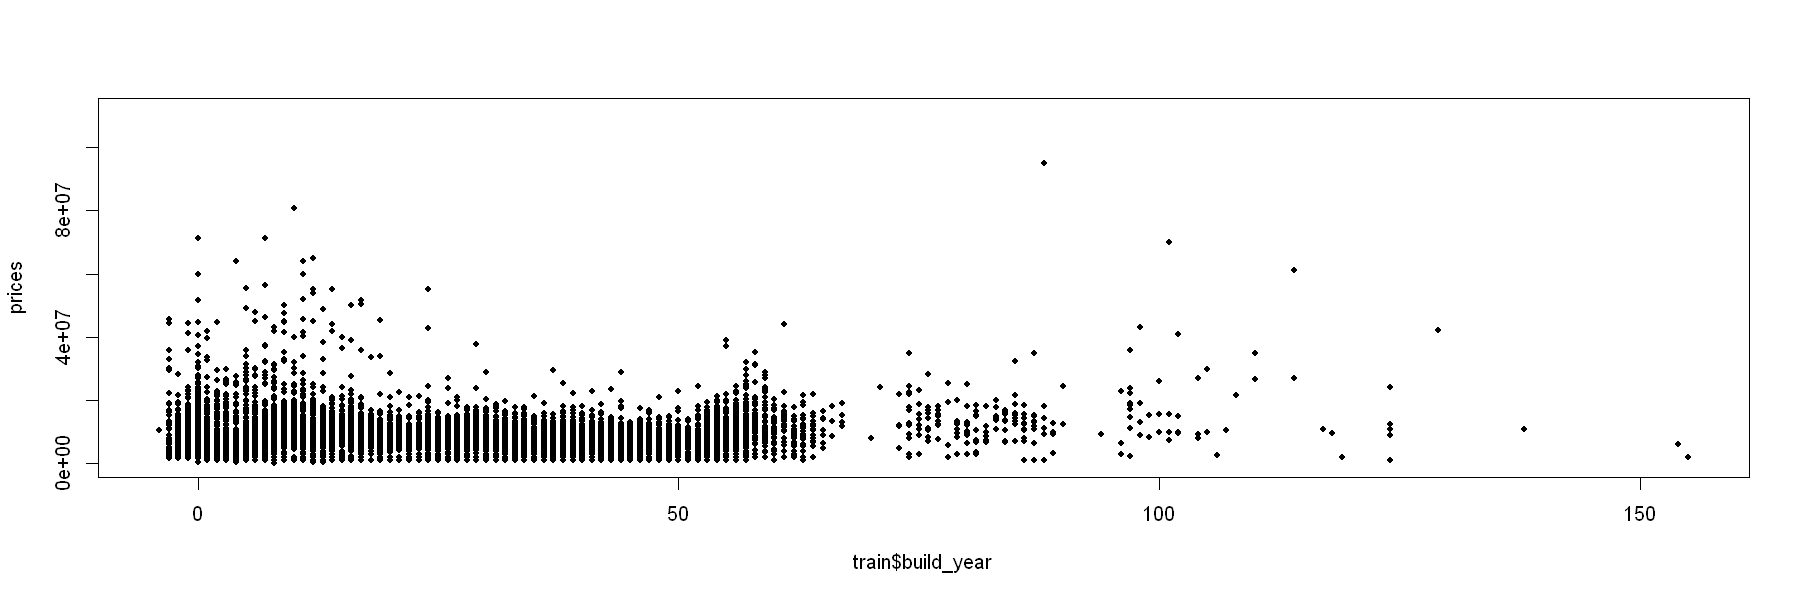

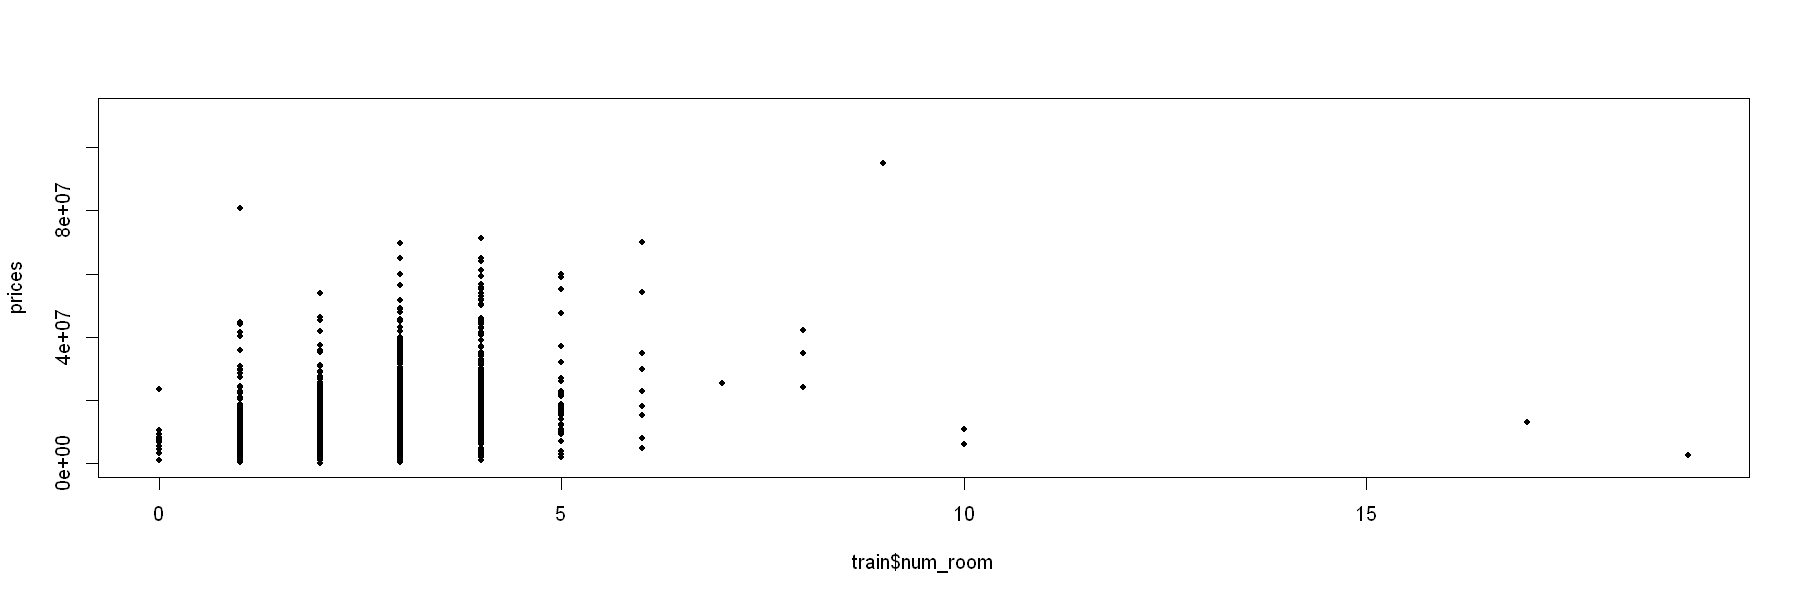

In [47]:
train$build_year <- as.numeric(substring(train$timestamp,1,4)) - train$build_year 
plot(train$build_year, prices, pch = 20)
train$num_room <- as.numeric(train$num_room)
plot(train$num_room, prices, pch = 20)
train$kitch_sq <- as.numeric(train$kitch_sq)

### Remove outliers in kitchen area

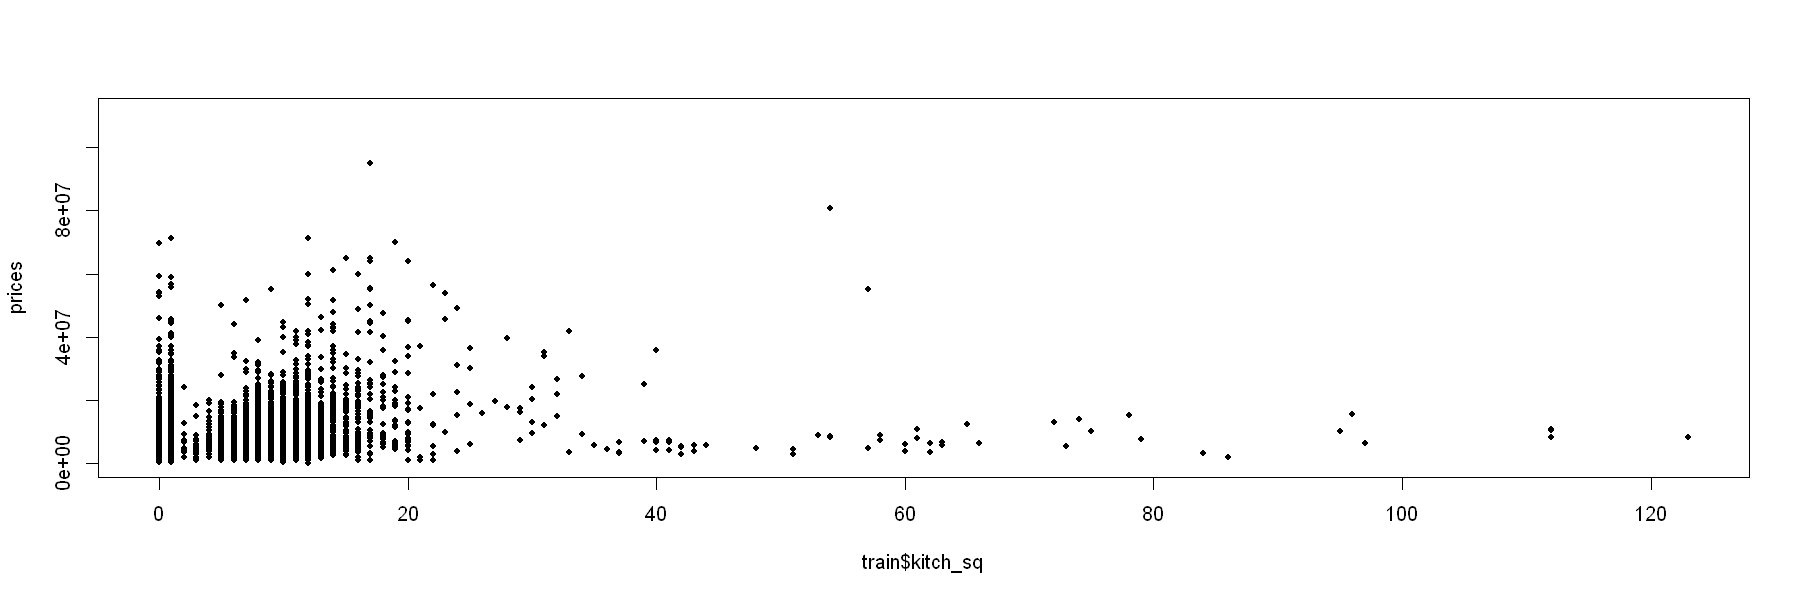

In [50]:
train$kitch_sq[which(train$kitch_sq>500)] <- rep(NA, length(train$kitch_sq[which(train$kitch_sq>500)]))
plot(train$kitch_sq, prices, pch = 20)

### Aparment Condition

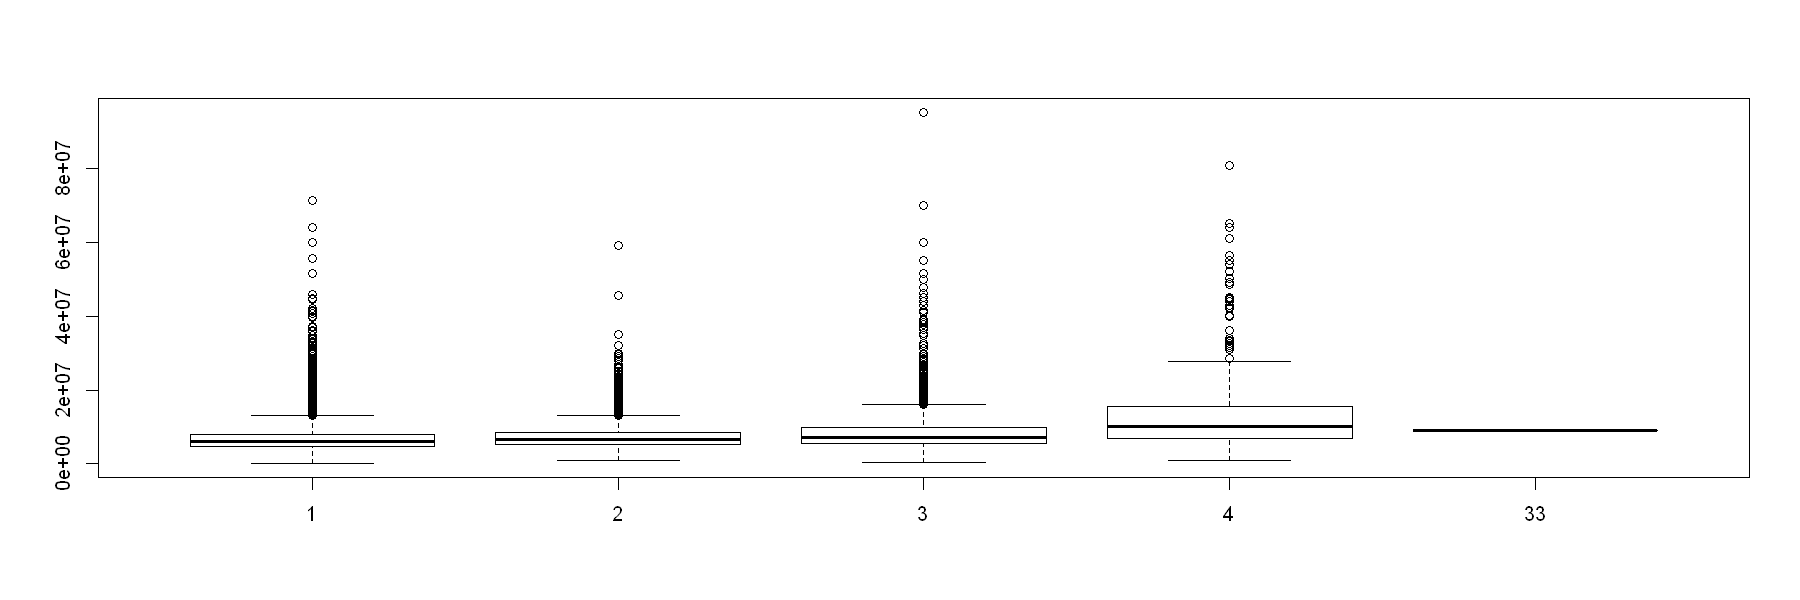

In [54]:
train$state <- as.factor(train$state)
plot(train$state, prices)  ### sangat jelas terlihat ada yang salah dengan 33'''

### diasumsikan bahwa 33 adalah 3

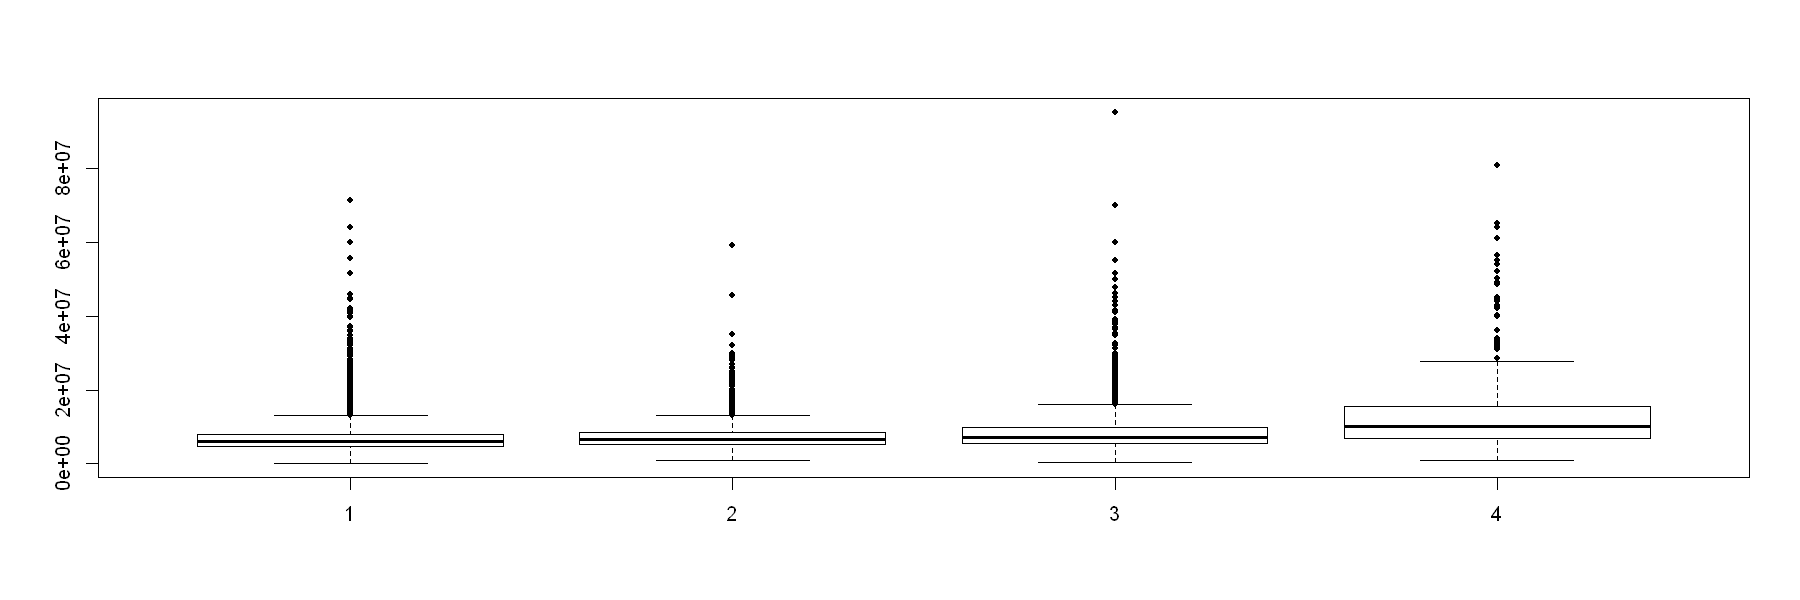

In [55]:
train$state[which(train$state == 33)] = 3
train$state <- factor(train$state)
plot(train$state, prices, pch = 20)

### Product Type

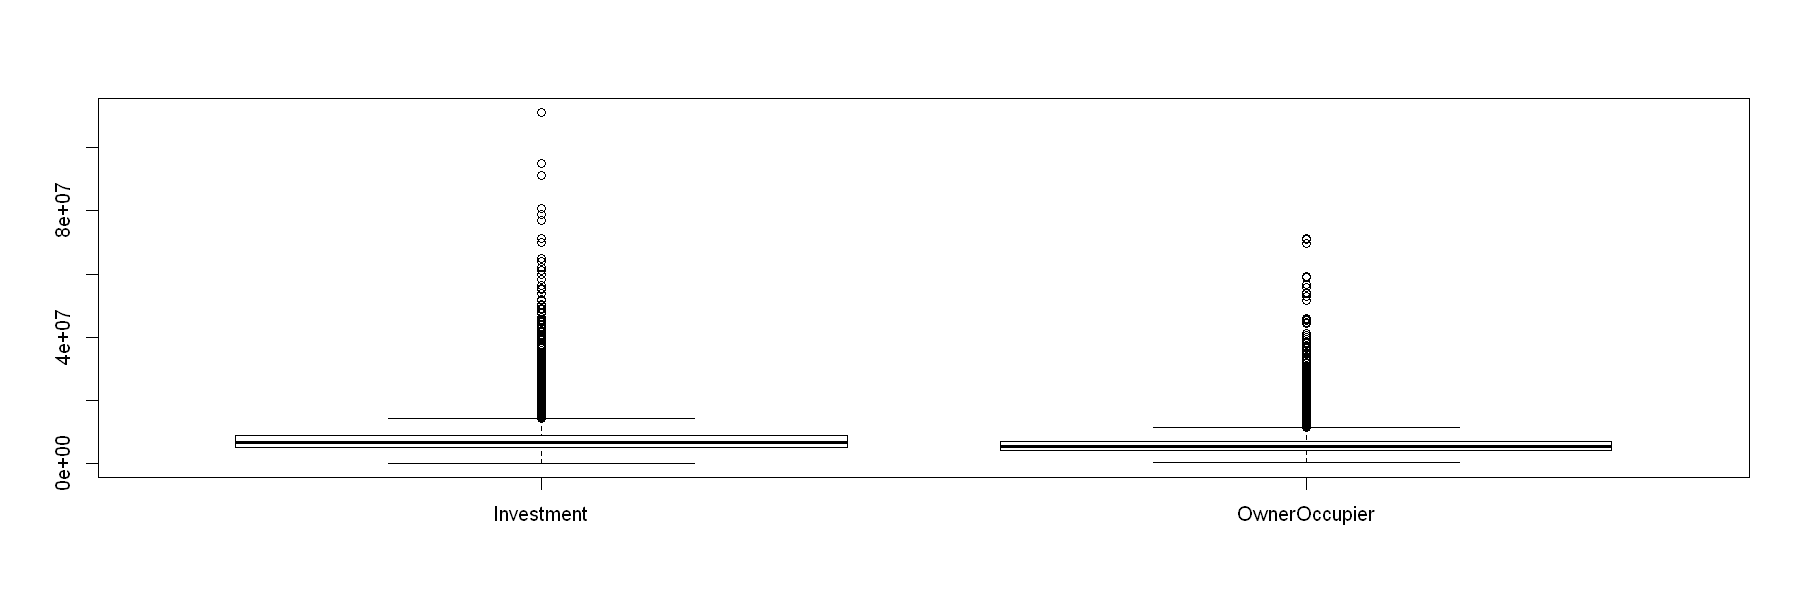

In [56]:
train$product_type <- factor(train$product_type)
plot(train$product_type, prices)

### Sub Area

    kemungkinan variable ini harus dihilangkan

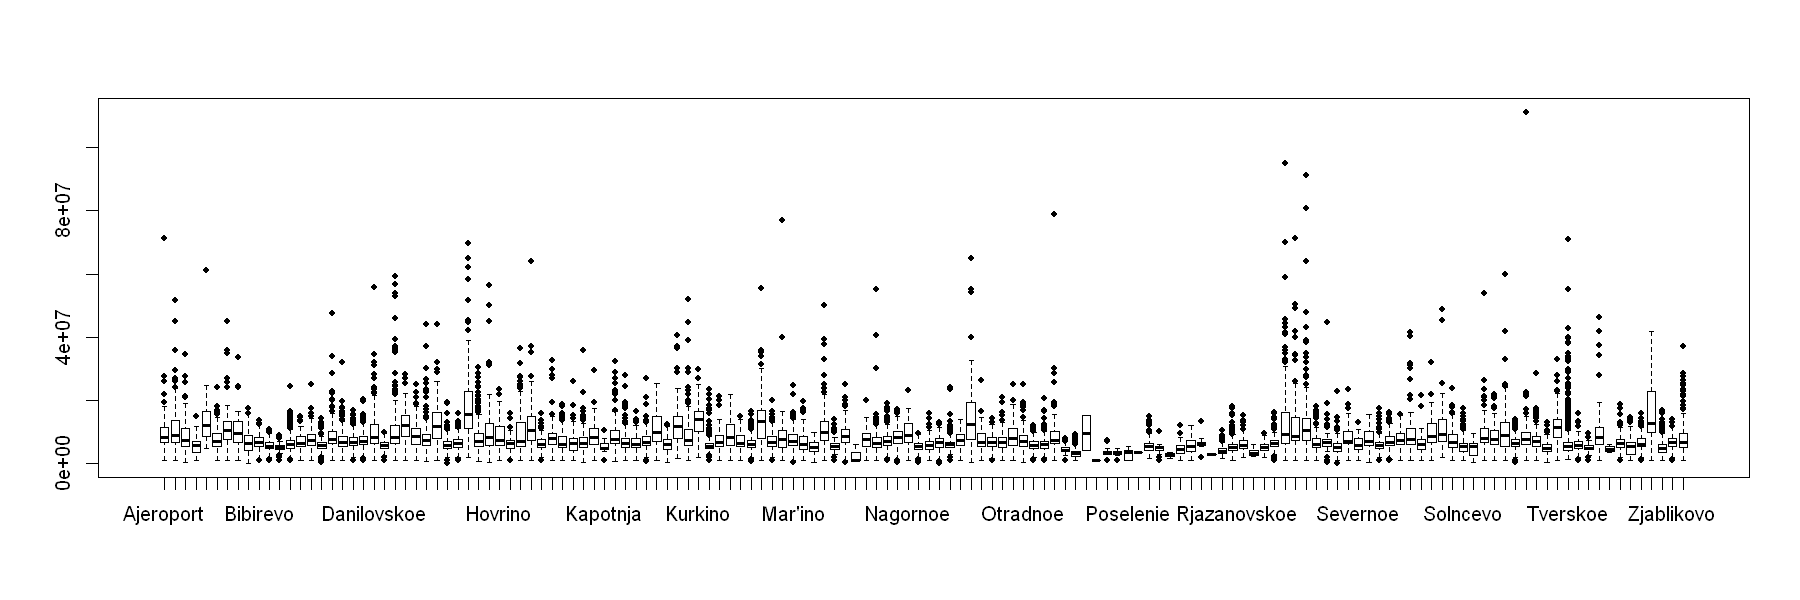

In [57]:
train$sub_area <- factor(train$sub_area)
plot(train$sub_area, prices, pch = 20) 

### Sub-Area Population

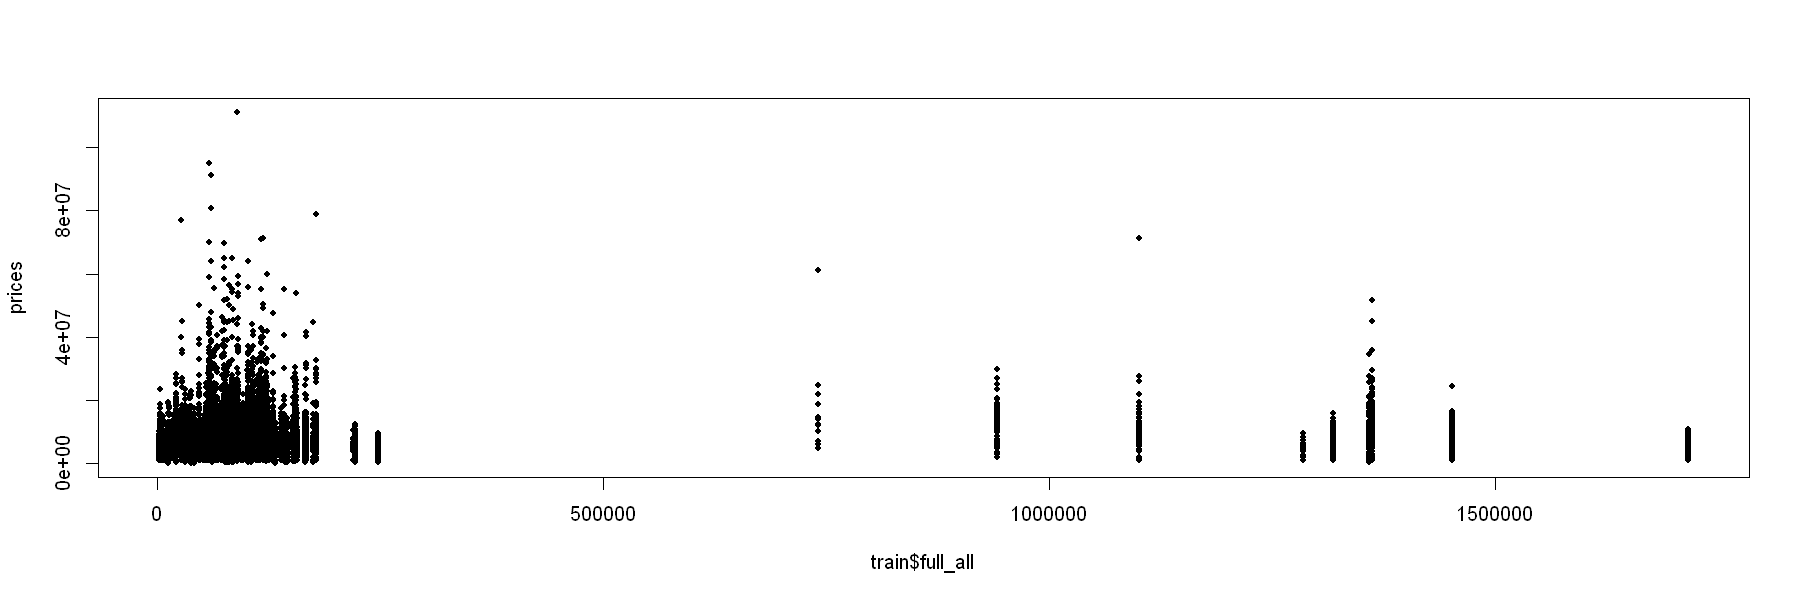

In [58]:
plot(train$full_all, prices, pch = 20)

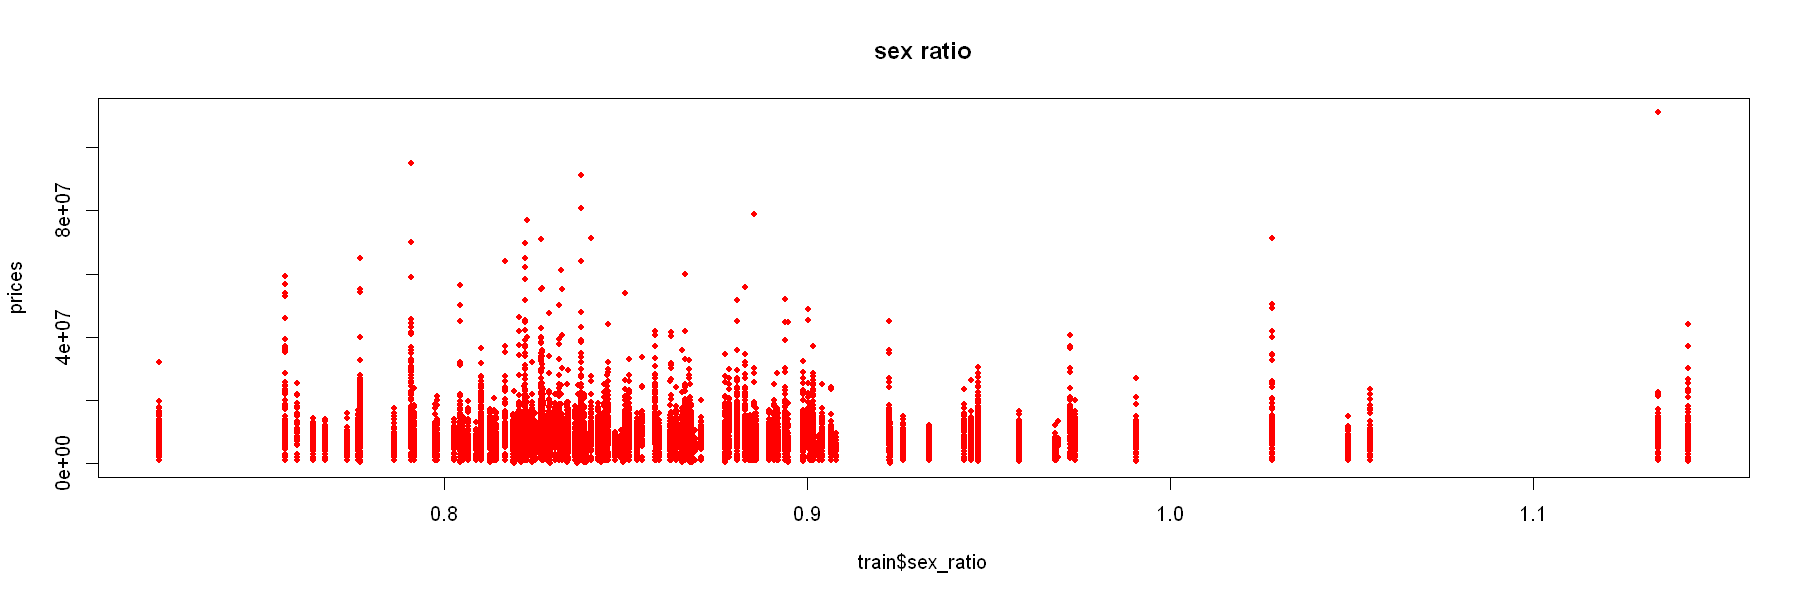

In [64]:
train$sex_ratio = train$male_f/train$female_f
plot(train$sex_ratio, prices, pch = 20, col = 'red')
title('sex ratio')

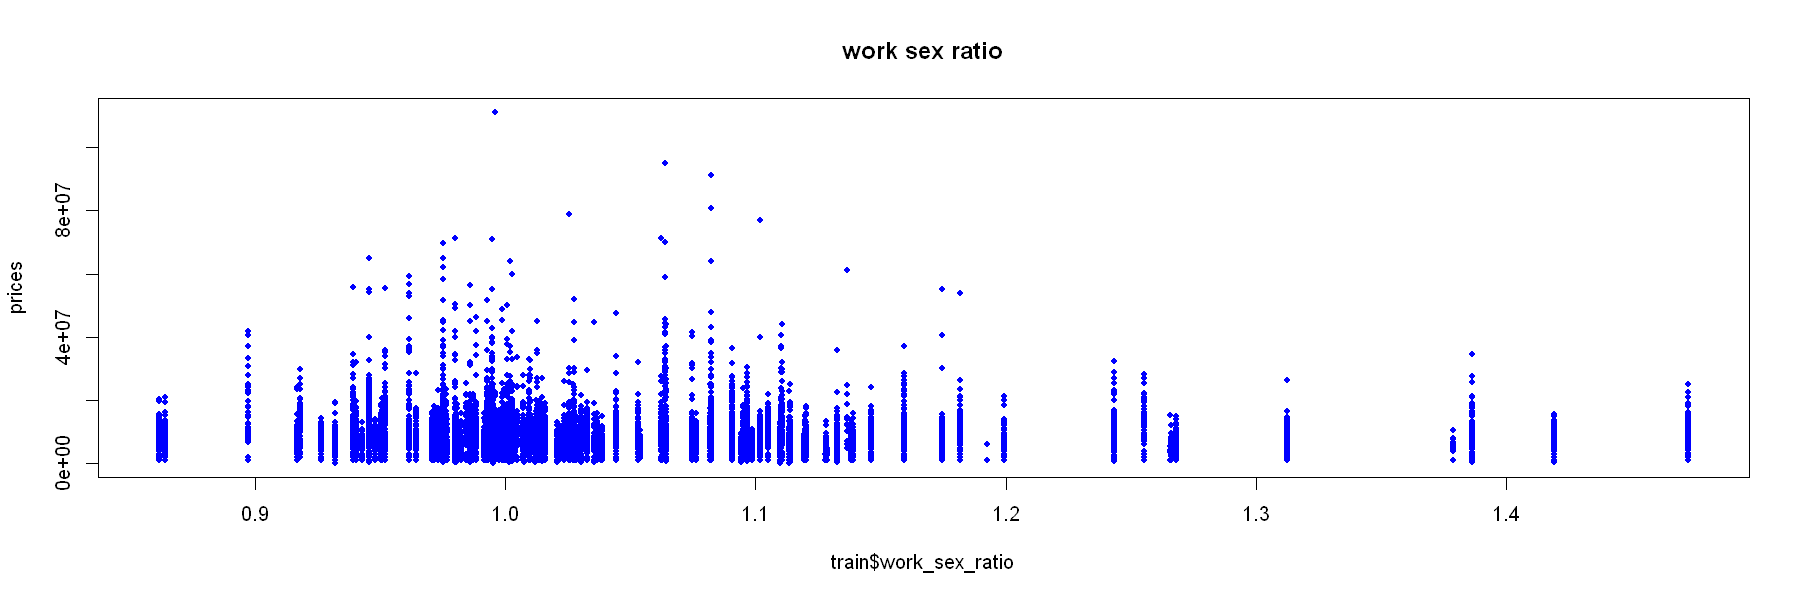

In [63]:
train$work_sex_ratio <-  train$work_male / train$work_female
plot(train$work_sex_ratio, prices, col = 'blue', pch = 20)
title('work sex ratio')

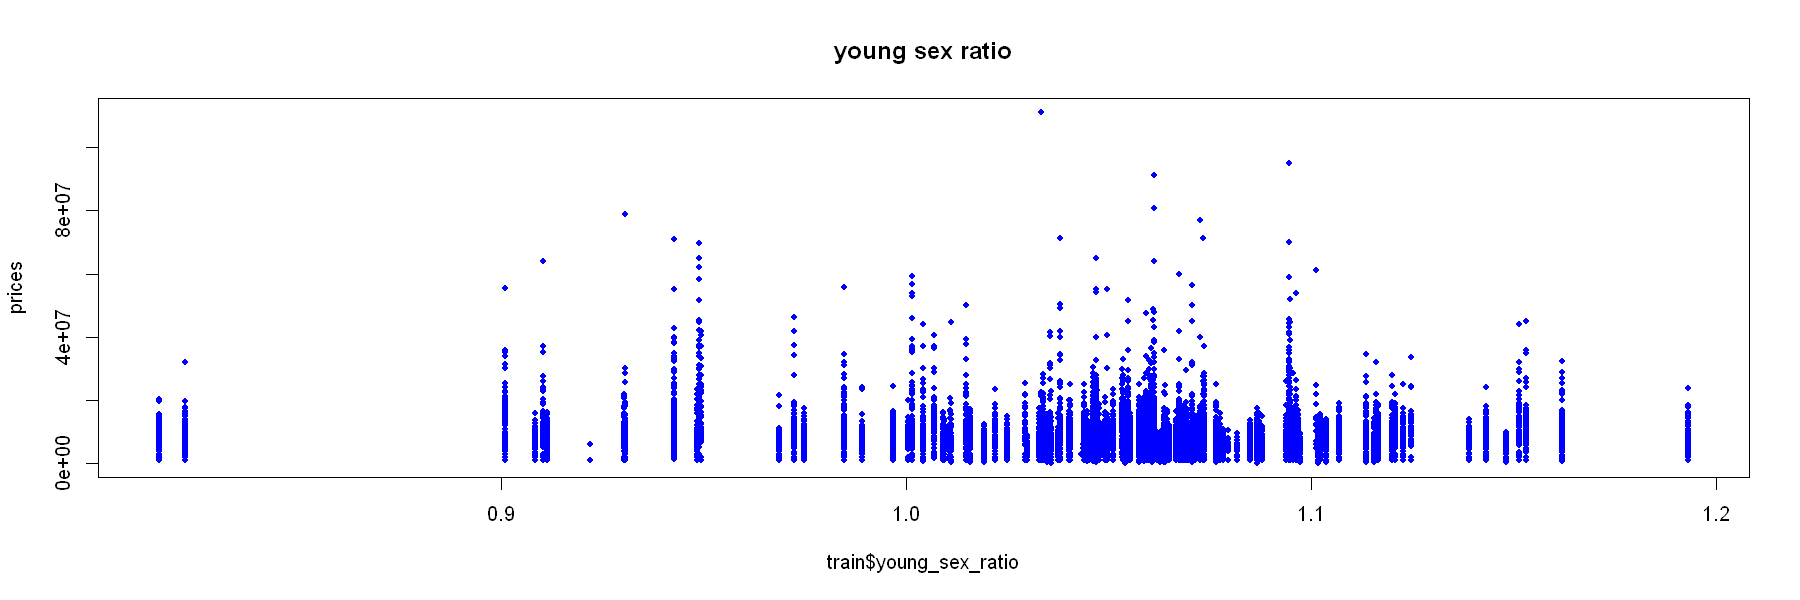

In [65]:
train$young_sex_ratio <- train$young_male / train$young_female
plot(train$young_sex_ratio, prices, col = 'blue', pch = 20)
title('young sex ratio')

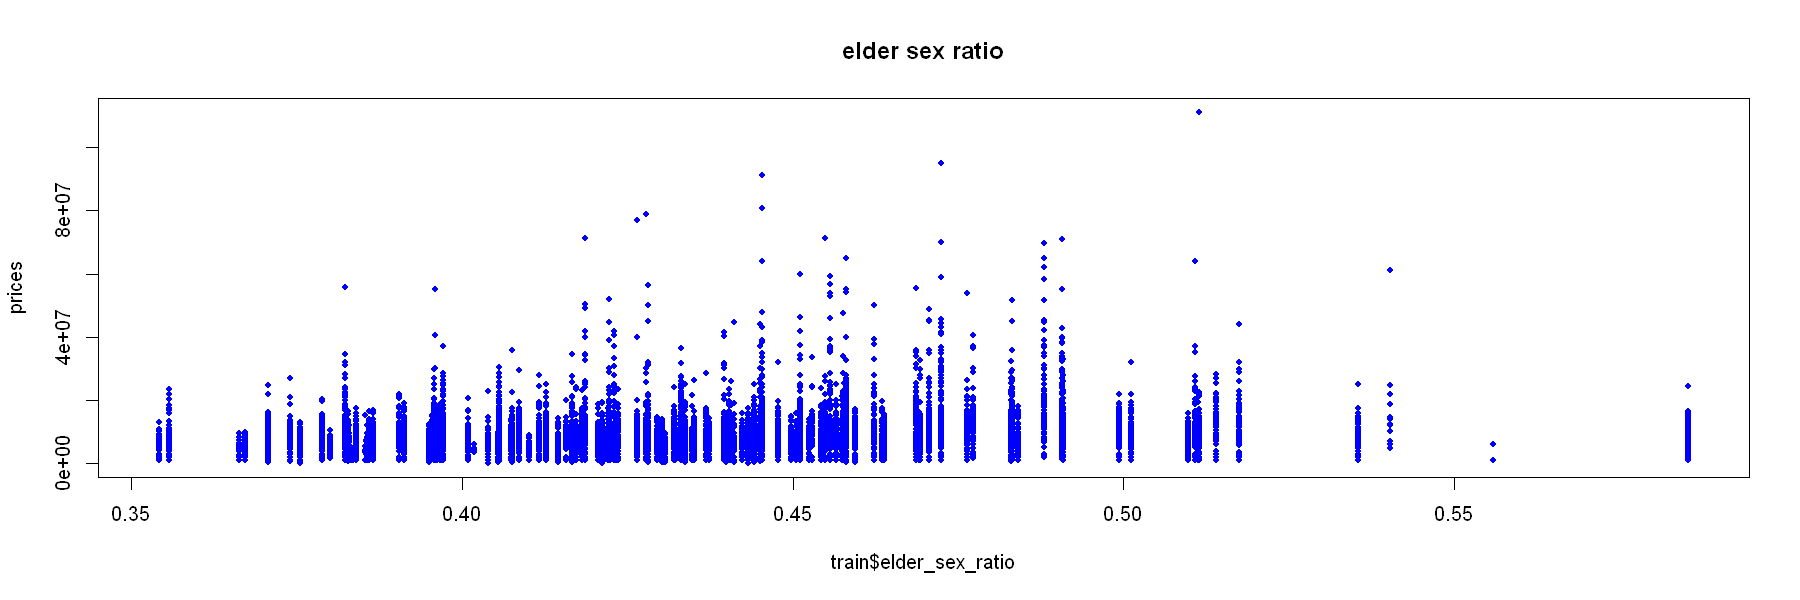

In [66]:
train$elder_sex_ratio <- train$ekder_male / train$ekder_female
plot(train$elder_sex_ratio, prices, pch = 20, col = 'blue')
title('elder sex ratio')

In [67]:
drops <- c('male_f','female_f','work_male','work_female',
           'young_male','young_female', 'work_all', 'young_all',
           'ekder_all','ekder_male','ekder_female')

In [68]:
train <- train[,!(names(train) %in% drops)]

In [69]:
# cek kesehatan
train$life_sq[which(train[["full_sq"]]<train[["life_sq"]])]<-NA
train$floor[which(train[["max_floor"]]<train[["floor"]])]<-NA

Warning message in Ops.factor(train[["max_floor"]], train[["floor"]]):
"'<' not meaningful for factors"

### Gabungkan variable makro

In [70]:
train <-merge(train,macro,by="timestamp")

In [71]:
head(train)

timestamp,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
2011-08-20,1,43,27,4,NA,NA,NA,NA,NA,...,271,6943,565,0.45356,1240,269768,22.37,64.12,23587,230310
2011-08-23,2,34,19,3,NA,NA,NA,NA,NA,...,271,6943,565,0.45356,1240,269768,22.37,64.12,23587,230310
2011-08-27,3,43,29,2,NA,NA,NA,NA,NA,...,271,6943,565,0.45356,1240,269768,22.37,64.12,23587,230310
2011-09-01,4,89,50,9,NA,NA,NA,NA,NA,...,271,6943,565,0.45356,1240,269768,22.37,64.12,23587,230310
2011-09-05,5,77,77,4,NA,NA,NA,NA,NA,...,271,6943,565,0.45356,1240,269768,22.37,64.12,23587,230310
2011-09-06,6,67,46,14,NA,NA,NA,NA,NA,...,271,6943,565,0.45356,1240,269768,22.37,64.12,23587,230310


### check nilai yang miss

In [72]:
missing_train <- as.numeric(apply(train, 2, function(x) sum(is.na(x))))
percentage_missing_train <- as.integer(missing_train / nrow(train) * 100)

In [73]:
percentage_missing_train

[1]  0  0  0 21  0 31 31 47 31 31 44  0  0  0  0  0  0  0 21  0  0 21  0  0 47
 [26]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 [51]  0  0  0  0  0  0  0 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16  0  0
 [76]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[101]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[126]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 43
[151] 43 43  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 21 21 21
[176]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 13 13 13  0  0
[201]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  5  5  0  0  0  0
[226]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  3  3  0  0  0  0  0  0
[251]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[276]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
[301]  0  0  0  0  0  0  0  0  0  0  0 10 10  0 10  0  0  0  0  0  0  0  0  0  0
[326]  0 10 10 10 10 10 10 10 10 10  0 10 10  0  0 10 10 10 10 10 10 10 10 10 10
[351]  0 10 10 10  0  0  0  0  0  0  0 55 10  0  0 18 18 10  0  0 10 10 10 81 97
[376]  0 55  0 55  0 10 55 10  0

### Variables with missing values, 83 out of 384

In [83]:
names(train)[percentage_missing_train !=0]
missing <- data.frame(cbind(names(train)[percentage_missing_train !=0],
                            percentage_missing_train[percentage_missing_train != 0]))
colnames(missing) <- c('Variable','Percentage Missing')
missing$'Percentage Missing' <- as.numeric(missing$'Percentage Missing')


[1] "life_sq"                               
 [2] "max_floor"                             
 [3] "material"                              
 [4] "build_year"                            
 [5] "num_room"                              
 [6] "kitch_sq"                              
 [7] "state"                                 
 [8] "preschool_quota"                       
 [9] "school_quota"                          
[10] "hospital_beds_raion"                   
[11] "raion_build_count_with_material_info"  
[12] "build_count_block"                     
[13] "build_count_wood"                      
[14] "build_count_frame"                     
[15] "build_count_brick"                     
[16] "build_count_monolith"                  
[17] "build_count_panel"                     
[18] "build_count_foam"                      
[19] "build_count_slag"                      
[20] "build_count_mix"                       
[21] "raion_build_count_with_builddate_info" 
[22] "build_count_before_1920"               
[23] "build_count_1921.1945"                 
[24] "build_count_1946.1970"                 
[25] "build_count_1971.1995"                 
[26] "build_count_after_1995"                
[27] "cafe_sum_500_min_price_avg"            
[28] "cafe_sum_500_max_price_avg"            
[29] "cafe_avg_price_500"                    
[30] "cafe_sum_1000_min_price_avg"           
[31] "cafe_sum_1000_max_price_avg"           
[32] "cafe_avg_price_1000"                   
[33] "cafe_sum_1500_min_price_avg"           
[34] "cafe_sum_1500_max_price_avg"           
[35] "cafe_avg_price_1500"                   
[36] "cafe_sum_2000_min_price_avg"           
[37] "cafe_sum_2000_max_price_avg"           
[38] "cafe_avg_price_2000"                   
[39] "cafe_sum_3000_min_price_avg"           
[40] "cafe_sum_3000_max_price_avg"           
[41] "cafe_avg_price_3000"                   
[42] "grp"                                   
[43] "grp_growth"                            
[44] "real_dispos_income_per_cap_growth"     
[45] "profitable_enterpr_share"              
[46] "unprofitable_enterpr_share"            
[47] "share_own_revenues"                    
[48] "overdue_wages_per_cap"                 
[49] "fin_res_per_cap"                       
[50] "marriages_per_1000_cap"                
[51] "divorce_rate"                          
[52] "construction_value"                    
[53] "invest_fixed_assets_phys"              
[54] "pop_migration"                         
[55] "pop_total_inc"                         
[56] "housing_fund_sqm"                      
[57] "lodging_sqm_per_cap"                   
[58] "water_pipes_share"                     
[59] "baths_share"                           
[60] "sewerage_share"                        
[61] "gas_share"                             
[62] "hot_water_share"                       
[63] "electric_stove_share"                  
[64] "heating_share"                         
[65] "old_house_share"                       
[66] "infant_mortarity_per_1000_cap"         
[67] "perinatal_mort_per_1000_cap"           
[68] "incidence_population"                  
[69] "load_of_teachers_preschool_per_teacher"
[70] "child_on_acc_pre_school"               
[71] "modern_education_share"                
[72] "old_education_build_share"             
[73] "provision_doctors"                     
[74] "power_clinics"                         
[75] "hospital_beds_available_per_cap"       
[76] "hospital_bed_occupancy_per_year"       
[77] "provision_retail_space_sqm"            
[78] "provision_retail_space_modern_sqm"     
[79] "theaters_viewers_per_1000_cap"         
[80] "museum_visitis_per_100_cap"            
[81] "population_reg_sports_share"           
[82] "students_reg_sports_share"             
[83] "apartment_build"

In [104]:
nrow(missing['Variable'])
ncol(train)
# ada 83 variable yang memiliki missing value dari 384 variable

[1] 83

[1] 384

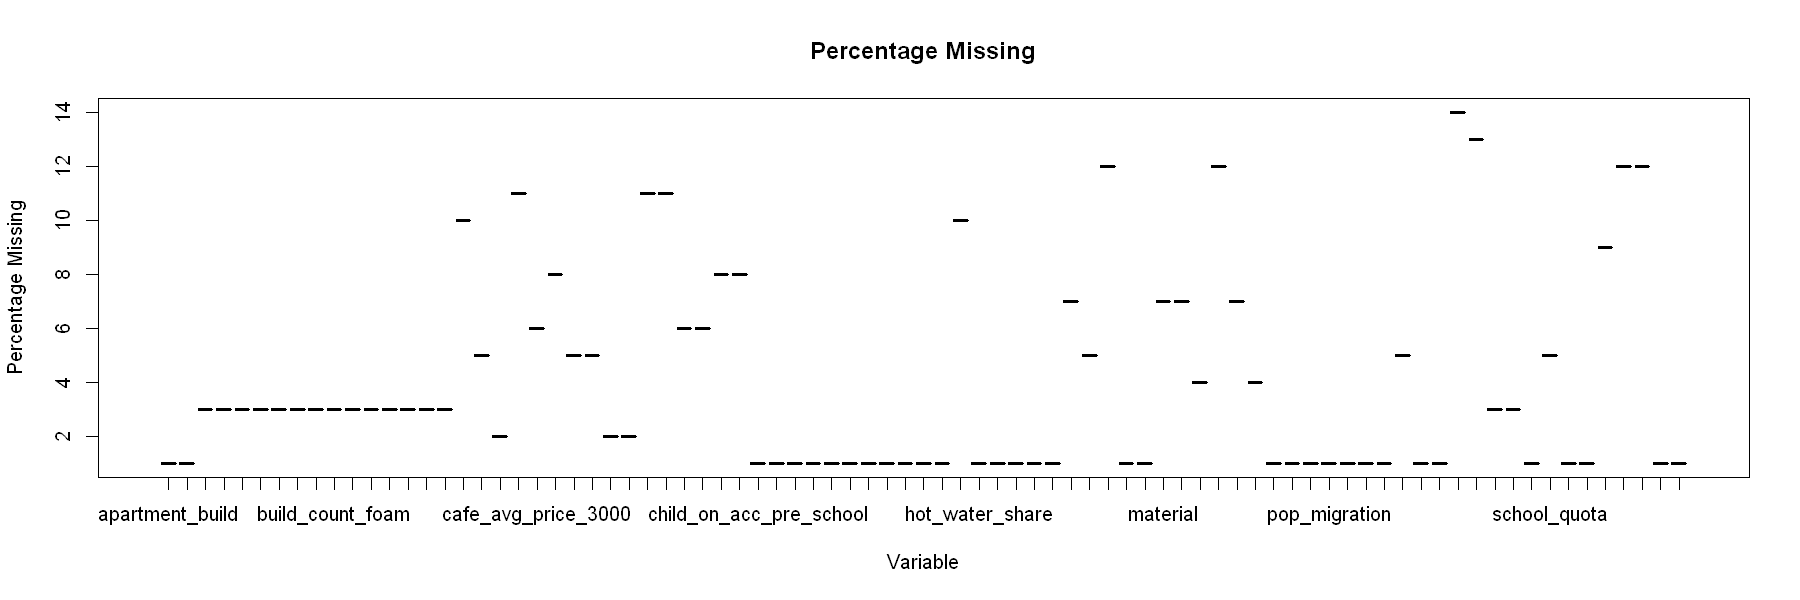

In [89]:
plot(missing, pch = 20, col = 'blue')
title('Percentage Missing')

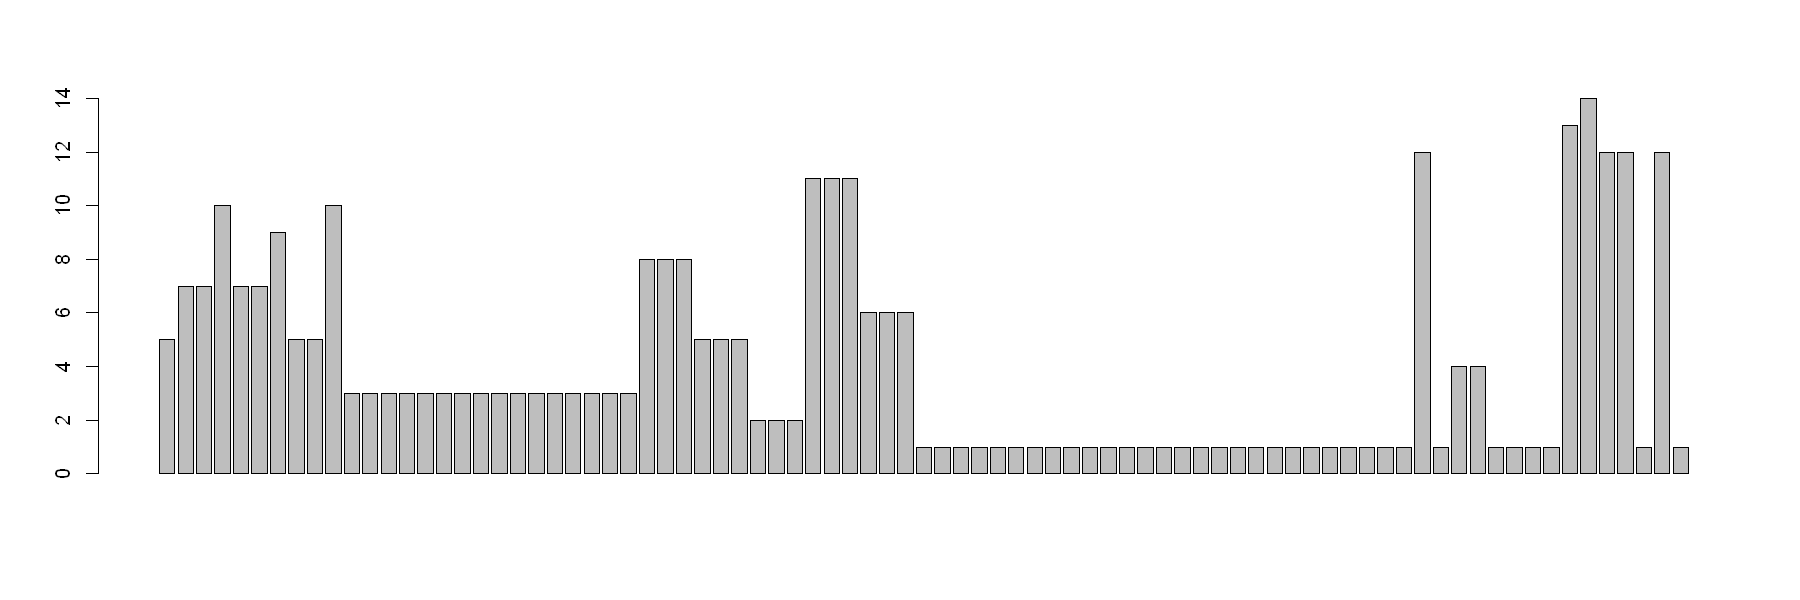

In [113]:
barplot(missing$`Percentage Missing`)

### Missing Value Treatment

In [117]:
natreatement<-function(x){
  x<-as.data.frame(x)
  vect<-names(which(sapply(x,is.numeric)))
  vect1<-sapply(x[,vect],function(y) mean(y,na.rm=T))
  vect1
  name<-names(vect1)
  for (i in 1:length(vect1)){
    x[which(is.na(x[,name[i]])),name[i]]<-vect1[i]
  }
  x<-na.omit(x)
}

In [118]:
train_1 <- natreatement(train)

In [119]:
library(data.table)
train_1 <- as.data.table(train_1)

In [121]:
head(train)

timestamp,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
2011-08-20,1,43,27,4,NA,NA,NA,NA,NA,...,271,6943,565,0.45356,1240,269768,22.37,64.12,23587,230310
2011-08-23,2,34,19,3,NA,NA,NA,NA,NA,...,271,6943,565,0.45356,1240,269768,22.37,64.12,23587,230310
2011-08-27,3,43,29,2,NA,NA,NA,NA,NA,...,271,6943,565,0.45356,1240,269768,22.37,64.12,23587,230310
2011-09-01,4,89,50,9,NA,NA,NA,NA,NA,...,271,6943,565,0.45356,1240,269768,22.37,64.12,23587,230310
2011-09-05,5,77,77,4,NA,NA,NA,NA,NA,...,271,6943,565,0.45356,1240,269768,22.37,64.12,23587,230310
2011-09-06,6,67,46,14,NA,NA,NA,NA,NA,...,271,6943,565,0.45356,1240,269768,22.37,64.12,23587,230310


In [120]:
head(train_1)

timestamp,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
2013-05-21,8059,11,11.0000,2,5,2,106,1,12,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
2013-05-25,8138,53,30.0000,10,16,1,33,2,8,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
2013-05-27,8156,77,41.0000,2,17,6,-1,3,12,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
2013-05-27,8157,45,27.0000,6,9,1,43,2,6,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
2013-05-28,8189,63,33.9195,17,17,4,0,2,1,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
2013-05-30,8258,74,46.0000,12,24,1,9,3,9,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3


In [123]:
install.packages('dummies', repos='http://cran.us.r-project.org')

package 'dummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\Rtmp00QdVc\downloaded_packages


In [164]:
library(dummies)
data_sberbank <- dummy.data.frame(train_1)

In [167]:
head(data_sberbank)

timestamp2013-05-21,timestamp2013-05-25,timestamp2013-05-27,timestamp2013-05-28,timestamp2013-05-30,timestamp2013-05-31,timestamp2013-06-01,timestamp2013-06-03,timestamp2013-06-05,timestamp2013-06-06,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
1,0,0,0,0,0,0,0,0,0,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
0,1,0,0,0,0,0,0,0,0,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
0,0,1,0,0,0,0,0,0,0,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
0,0,1,0,0,0,0,0,0,0,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
0,0,0,1,0,0,0,0,0,0,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
0,0,0,0,1,0,0,0,0,0,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3


In [168]:
head(train_1)

timestamp,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
2013-05-21,8059,11,11.0000,2,5,2,106,1,12,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
2013-05-25,8138,53,30.0000,10,16,1,33,2,8,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
2013-05-27,8156,77,41.0000,2,17,6,-1,3,12,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
2013-05-27,8157,45,27.0000,6,9,1,43,2,6,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
2013-05-28,8189,63,33.9195,17,17,4,0,2,1,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3
2013-05-30,8258,74,46.0000,12,24,1,9,3,9,...,271,9350,627,0.43939,1440,329348,26.7,76.2,46352,226047.3


    Outliers Detection
    For missing values that lie outside the 1.5*IQR limits
    we could cap it by replacing those observations outside the lower limit with the value of 5th %ile
    those that lie above the upper limit, with the value of 95th %ile.
    
    Deteksi outlier untuk nilai yang di luar 1.5*IQR (jangkauan, Q3 - Q1)
    Untuk nilai yang di bawah jangkauan di atas, maka akan diganti dengan nilai ke-5 dari percentile
    Untuk nilai yang di atas jangkauan di atas, maka akan diganti dengan nilai ke-95 dari percentile

In [169]:
for(i in 1:ncol(data_sberbank[,2:ncol(data_sberbank)])){
  qnt <- quantile(data_sberbank[,2:ncol(data_sberbank)][,i], probs=c(.25, .75))
  caps <- quantile(data_sberbank[,2:ncol(data_sberbank)][,i], probs=c(.05, .95))
  H <- 1.5 * IQR(data_sberbank[,2:ncol(data_sberbank)][,i], na.rm = T)
  data_sberbank[,2:ncol(data_sberbank)][,i][data_sberbank[,2:ncol(data_sberbank)][,i] < (qnt[1] - H)] <- caps[1]
  data_sberbank[,2:ncol(data_sberbank)][,i][data_sberbank[,2:ncol(data_sberbank)][,i] > (qnt[2] + H)] <- caps[2]
  
}

    Adanya prediktor konstan dan mendekati konstan di seluruh sampel yang tidak informatif dapat mematahkan model kita
    Secara default, prediktor diklasifikasikan sebagai varian yang mendekati nol jika
     1) persentase nilai unik pada sampel <10%
     2) bila rasio frekuensi > 19 (95/5)

In [170]:
library(caret)
insignificant <- nearZeroVar(data_sberbank, freqCut = 95/5, uniqueCut = 10)
data_sberbank <- as.data.table(data_sberbank)
data_sberbank <- data_sberbank[,-insignificant,with=F]
data_sberbank_timestamp <- data_sberbank$timestamp
data_sberbank_id <- data_sberbank$id
# Remove timestamp column from the data
data_sberbank <- data_sberbank[,c(-1,-2)]

### Reduction of Multicolinearity    
    Untuk memenuhi asumsi tidak ada kolinieritas dari multiple linear regressions, 
    maka diasumsikan bahwa variabel independent tidak memiliki korelasi yang tinggi satu sama lain

In [171]:
data_sberbank <- as.data.frame(data_sberbank)
dim(data_sberbank)
which(names(data_sberbank) == "price_doc")
data_sberbank1 <-  data_sberbank[,-(which(names(data_sberbank) == "price_doc"))]

[1] 14135   389

[1] 292

In [172]:
correlationmatrix <- cor(data_sberbank1[,2:ncol(data_sberbank1)])

In [173]:
head(correlationmatrix)

,floor1,floor2,floor3,floor4,floor5,floor6,floor7,floor8,floor9,max_floor,...,hospital_bed_occupancy_per_year,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
floor1,1.00000000,-0.09486286,-0.09685073,-0.08962540,-0.09266206,-0.07364435,-0.07629131,-0.07155549,-0.07110508,-0.184097029,...,-0.004647458,0.004647458,-0.004647458,0.004647458,-0.004647458,0.004647458,0.004647458,-0.004647458,-0.004647458,0.004647458
floor2,-0.09486286,1.00000000,-0.11437654,-0.10584373,-0.10942990,-0.08697081,-0.09009675,-0.08450395,-0.08397204,-0.135080842,...,0.001819327,-0.001819327,0.001819327,-0.001819327,0.001819327,-0.001819327,-0.001819327,0.001819327,0.001819327,-0.001819327
floor3,-0.09685073,-0.11437654,1.00000000,-0.10806171,-0.11172303,-0.08879330,-0.09198474,-0.08627475,-0.08573169,-0.138915793,...,-0.008734551,0.008734551,-0.008734551,0.008734551,-0.008734551,0.008734551,0.008734551,-0.008734551,-0.008734551,0.008734551
floor4,-0.08962540,-0.10584373,-0.10806171,1.00000000,-0.10338818,-0.08216907,-0.08512242,-0.07983841,-0.07933587,-0.121953767,...,0.010495107,-0.010495107,0.010495107,-0.010495107,0.010495107,-0.010495107,-0.010495107,0.010495107,0.010495107,-0.010495107
floor5,-0.09266206,-0.10942990,-0.11172303,-0.10338818,1.00000000,-0.08495310,-0.08800652,-0.08254348,-0.08202391,-0.136767619,...,0.007598686,-0.007598686,0.007598686,-0.007598686,0.007598686,-0.007598686,-0.007598686,0.007598686,0.007598686,-0.007598686
floor6,-0.07364435,-0.08697081,-0.08879330,-0.08216907,-0.08495310,1.00000000,-0.06994430,-0.06560248,-0.06518954,0.002587698,...,0.002284019,-0.002284019,0.002284019,-0.002284019,0.002284019,-0.002284019,-0.002284019,0.002284019,0.002284019,-0.002284019


In [174]:
highlyCorrelated <- findCorrelation(correlationmatrix, cutoff=0.8)
highlyCorrelated

[1]  21  22  30  32  55  56  57  58  59  60  61  62  63  64  65  66  67  68
 [19]  69  73  88  89  90  93 103 106 112 113 114 120 126 128 135 136 138 141
 [37] 145 150 151 155 161 166 167 185 187 188 192 200 201 202 203 204 206 208
 [55] 210 211 212 213 214 220 222 223 224 225 226 227 228 230 231 232 233 234
 [73] 235 236 238 239 240 242 243 244 245 246 247 248 249 251 253 254 255 256
 [91] 257 258 259 260 262 263 265 266 268 270 271 272 273 274 277 278 279 280
[109] 281 282 284 285 286 288 289 298 303 305 310 312 314 326  24  27  28  39
[127]  40  44  46  48  50  52  70  99 100 108 102 111 140 162 164 181 207 275
[145] 295 300 306 299 304 307 320 321 323 324 325 327 328 329 330 331 332 333
[163] 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351
[181] 352 353 354 355 359 362 356 364 365 366 367 368 369 370 371 372 373 374
[199] 375 376 377 378 379 380 381 382 383 384 385 386

In [175]:
data_sberbank <- as.data.table(data_sberbank)
data_sberbank<-data_sberbank[,-colnames(correlationmatrix[,highlyCorrelated]),with=F]
dim(data_sberbank)

[1] 14135   179

In [176]:
library(randomForest)

completes <- complete.cases(data_sberbank)
trControl <- trainControl(method='none')
rfmod <- train(price_doc ~ . , method='rf', data=data_sberbank[completes, ], 
               trControl=trControl, tuneLength=1, importance=TRUE)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [177]:
rfmod

Random Forest 

14135 samples
  178 predictor

No pre-processing
Resampling: None 

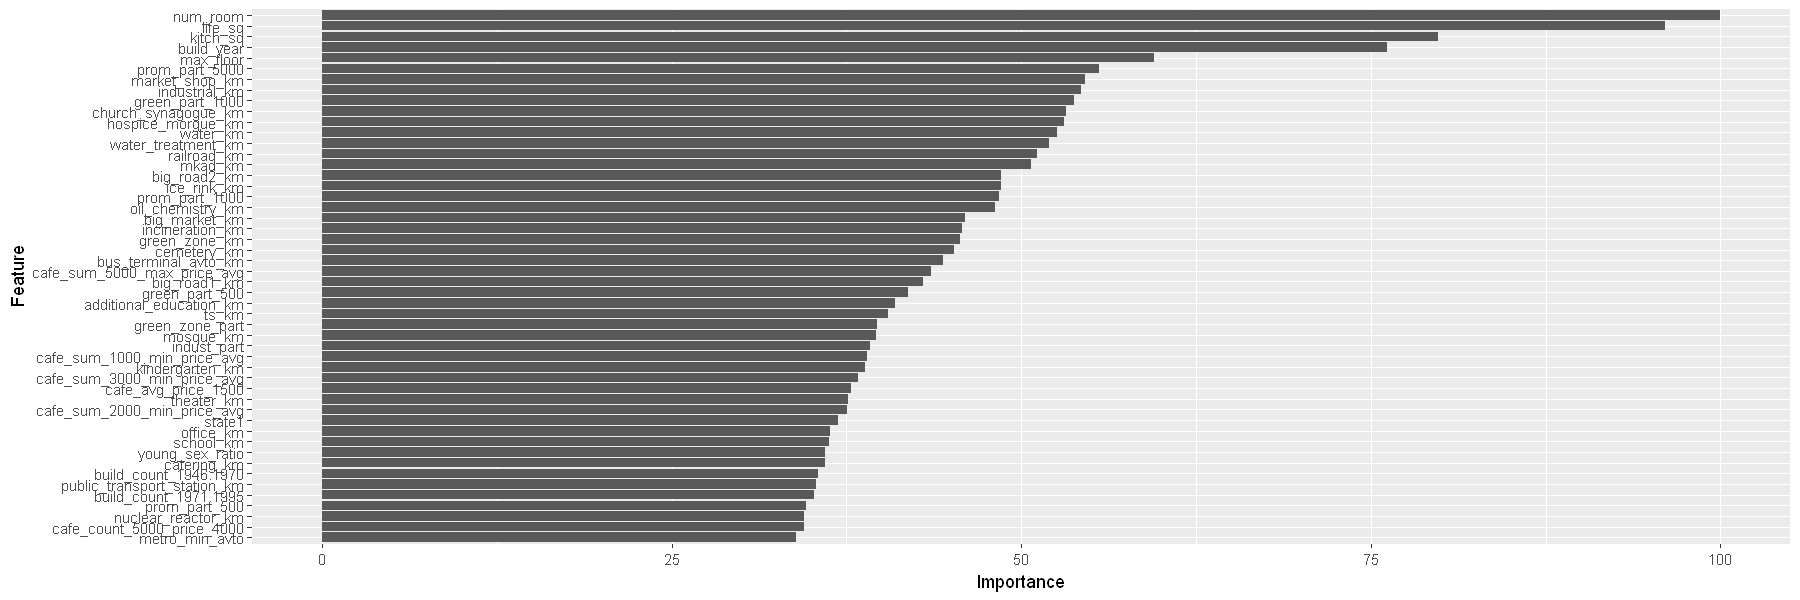

In [178]:
# visulaization of features importance
ggplot(varImp(rfmod), top = 50)
important<-rownames(varImp(rfmod)$importance)

### extrating the 50 most important features 

In [180]:
data_sberbank <- as.data.frame(data_sberbank)
fdata_sberbank <- cbind(data_sberbank[,intersect(names(data_sberbank),
                                               important[1:50])],
                      data_sberbank[,"price_doc"])

In [181]:
names(fdata_sberbank)[ncol(fdata_sberbank)] <- "price_doc"

In [183]:
head(fdata_sberbank)

life_sq,floor1,floor2,floor3,floor4,floor5,floor6,floor7,floor8,floor9,...,build_count_block,build_count_wood,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,price_doc
11.0000,0,1,0,0,0,0,0,0,0,...,19.00000,4.00000,301.0000,49.00000,8.0000,0,11.000000,1.0000000,757.0000,2750000
30.0000,0,0,0,0,0,0,0,0,0,...,9.00000,71.00000,71.0000,13.00000,84.0000,0,4.000000,4.0000000,300.0000,9000000
41.0000,0,1,0,0,0,0,0,0,0,...,50.29745,40.84843,108.0487,12.04364,107.2369,1,4.491797,0.5731554,328.3285,7011550
27.0000,0,0,0,0,0,1,0,0,0,...,4.00000,0.00000,25.0000,1.00000,124.0000,0,0.000000,0.0000000,154.0000,7100000
33.9195,0,0,0,0,0,0,0,0,0,...,3.00000,0.00000,10.0000,2.00000,28.0000,0,0.000000,0.0000000,41.0000,5903808
46.0000,0,0,0,0,0,0,0,0,0,...,41.00000,1.00000,23.0000,7.00000,122.0000,0,0.000000,0.0000000,193.0000,12100000


In [184]:
# Save the clean data in a CSV file
clean_data <- cbind(data_sberbank[,intersect(names(data_sberbank),
                                             important)],
                    data_sberbank[,"price_doc"])

In [185]:
head(clean_data)

life_sq,floor1,floor2,floor3,floor4,floor5,floor6,floor7,floor8,floor9,...,mortgage_growth,mortgage_rate,income_per_cap,rent_price_4.room_bus,rent_price_3room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_1room_eco,apartment_fund_sqm,"data_sberbank[, ""price_doc""]"
11.0000,0,1,0,0,0,0,0,0,0,...,0.2732447,12.62,46508.8,160.69,87.26,51.77,47.35,32.87,226047.3,2750000
30.0000,0,0,0,0,0,0,0,0,0,...,0.2732447,12.62,46508.8,160.69,87.26,51.77,47.35,32.87,226047.3,9000000
41.0000,0,1,0,0,0,0,0,0,0,...,0.2732447,12.62,46508.8,160.69,87.26,51.77,47.35,32.87,226047.3,7011550
27.0000,0,0,0,0,0,1,0,0,0,...,0.2732447,12.62,46508.8,160.69,87.26,51.77,47.35,32.87,226047.3,7100000
33.9195,0,0,0,0,0,0,0,0,0,...,0.2732447,12.62,46508.8,160.69,87.26,51.77,47.35,32.87,226047.3,5903808
46.0000,0,0,0,0,0,0,0,0,0,...,0.2732447,12.62,46508.8,160.69,87.26,51.77,47.35,32.87,226047.3,12100000


In [186]:
clean_data$id <- data_sberbank_id
clean_data$timestamp <- data_sberbank_timestamp
write_csv(clean_data, 'clean.csv') # last 2 columns being ID, timestamp

In [188]:
head(clean_data)

life_sq,floor1,floor2,floor3,floor4,floor5,floor6,floor7,floor8,floor9,...,mortgage_rate,income_per_cap,rent_price_4.room_bus,rent_price_3room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_1room_eco,apartment_fund_sqm,"data_sberbank[, ""price_doc""]",id
11.0000,0,1,0,0,0,0,0,0,0,...,12.62,46508.8,160.69,87.26,51.77,47.35,32.87,226047.3,2750000,8059
30.0000,0,0,0,0,0,0,0,0,0,...,12.62,46508.8,160.69,87.26,51.77,47.35,32.87,226047.3,9000000,8138
41.0000,0,1,0,0,0,0,0,0,0,...,12.62,46508.8,160.69,87.26,51.77,47.35,32.87,226047.3,7011550,8156
27.0000,0,0,0,0,0,1,0,0,0,...,12.62,46508.8,160.69,87.26,51.77,47.35,32.87,226047.3,7100000,8157
33.9195,0,0,0,0,0,0,0,0,0,...,12.62,46508.8,160.69,87.26,51.77,47.35,32.87,226047.3,5903808,8189
46.0000,0,0,0,0,0,0,0,0,0,...,12.62,46508.8,160.69,87.26,51.77,47.35,32.87,226047.3,12100000,8258


### Test data

In [238]:
test <- read.csv("test.csv")
# test<-merge(test,macro,by="timestamp")
# test<-dummy.data.frame(test)
# test<-as.data.table(test)

In [239]:
head(test)

id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
30474,2015-07-01,39.00,20.7,2,9,1,1998,1,8.9,...,8,0,0,0,1,10,1,0,14,1
30475,2015-07-01,79.20,NA,8,17,1,0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
30476,2015-07-01,40.50,25.1,3,5,2,1960,2,4.8,...,42,11,4,0,10,21,0,10,71,11
30477,2015-07-01,62.80,36.0,17,17,1,2016,2,62.8,...,1,1,2,0,0,10,0,0,2,0
30478,2015-07-01,40.00,40.0,17,17,1,0,1,1.0,...,5,1,1,0,2,12,0,1,11,1
30479,2015-07-01,48.43,NA,21,1,1,2015,1,1.0,...,143,99,57,12,23,42,1,13,123,7


In [240]:
head(macro)

timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
2010-01-01,76.1,NA,NA,NA,NA,NA,NA,NA,NA,...,690,6221,527,0.41,993,NA,NA,63.03,22825,NA
2010-01-02,76.1,NA,NA,NA,NA,NA,NA,NA,NA,...,690,6221,527,0.41,993,NA,NA,63.03,22825,NA
2010-01-03,76.1,NA,NA,NA,NA,NA,NA,NA,NA,...,690,6221,527,0.41,993,NA,NA,63.03,22825,NA
2010-01-04,76.1,NA,NA,NA,NA,NA,NA,NA,29.905,...,690,6221,527,0.41,993,NA,NA,63.03,22825,NA
2010-01-05,76.1,NA,NA,NA,NA,NA,NA,NA,29.836,...,690,6221,527,0.41,993,NA,NA,63.03,22825,NA
2010-01-06,76.1,NA,NA,NA,NA,NA,NA,NA,29.715,...,690,6221,527,0.41,993,NA,NA,63.03,22825,NA


In [244]:
dim(train)
dim(test)
dim(macro)

[1] 30471   384

[1] 7662  291

[1] 2484  100

In [245]:
test$material <- as.factor(test$material)
test$floor <- as.factor(test$floor)

### Check Outlier

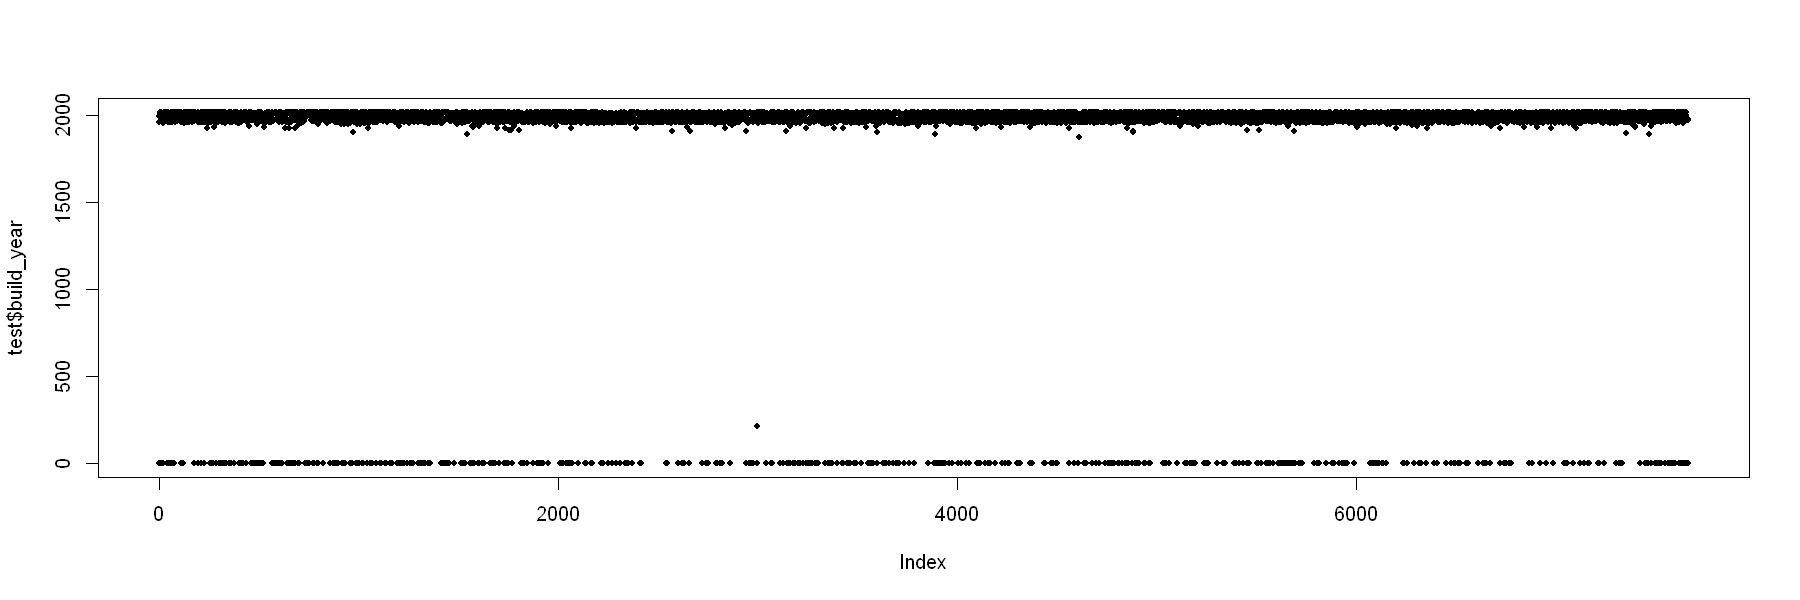

In [246]:
plot(test$build_year, pch = 20)

In [247]:
test$build_year[which(test$build_year < 1800)] <- NA

In [250]:
test$build_year <- as.numeric(substring(test$timestamp,1,4)) - test$build_year

### Replace with NA

In [252]:
head(test)

id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
30474,2015-07-01,39.00,20.7,2,9,1,17,1,8.9,...,8,0,0,0,1,10,1,0,14,1
30475,2015-07-01,79.20,NA,8,17,1,NA,3,1.0,...,4,1,1,0,2,11,0,1,12,1
30476,2015-07-01,40.50,25.1,3,5,2,55,2,4.8,...,42,11,4,0,10,21,0,10,71,11
30477,2015-07-01,62.80,36.0,17,17,1,-1,2,62.8,...,1,1,2,0,0,10,0,0,2,0
30478,2015-07-01,40.00,40.0,17,17,1,NA,1,1.0,...,5,1,1,0,2,12,0,1,11,1
30479,2015-07-01,48.43,NA,21,1,1,0,1,1.0,...,143,99,57,12,23,42,1,13,123,7


In [255]:
# plot(test$build_year < 1500, pch = 20)
# # points(train$build_year[which(train$build_year < 1900)], 
# #      prices[which(train$build_year < 1900)], pch = 19, col = 'yellow')
# # legend('topleft',col = c('yellow', 'black'), pch = c(19,20),
# #        legend = c('Outliers','Normal Observations'))

In [257]:
test$state <- factor(test$state)

In [258]:
test<-dummy.data.frame(test)

### Sub-Area Population

In [259]:
test$sex_ratio = test$male_f/test$female_f
test$work_sex_ratio <-  test$work_male / test$work_female
test$young_sex_ratio <- test$young_male / test$young_female
test$elder_sex_ratio <- test$ekder_male / test$ekder_female
drops <- c('male_f','female_f','work_male','work_female',
           'young_male','young_female', 'work_all', 'young_all',
           'ekder_all','ekder_male','ekder_female')

test <- as.data.frame(test)
test <- test[,!(names(test) %in% drops)]
# Some sanity checks
# test$life_sq[which(test[["full_sq"]]<test[["life_sq"]])]<-NA
# test$floor[which(test[["max_floor"]]<test[["floor"]])]<-NA
test <- as.data.table(test)

### Missing Value Treatment; Check for Missing Values

In [260]:
missing_test <- as.numeric(apply(test, 2, function(x) sum(is.na(x))))
percentage_missing_test <- as.integer(missing_test / nrow(test) * 100)

[1] "life_sq"                              
 [2] "build_year"                           
 [3] "preschool_quota"                      
 [4] "school_quota"                         
 [5] "hospital_beds_raion"                  
 [6] "raion_build_count_with_material_info" 
 [7] "build_count_block"                    
 [8] "build_count_wood"                     
 [9] "build_count_frame"                    
[10] "build_count_brick"                    
[11] "build_count_monolith"                 
[12] "build_count_panel"                    
[13] "build_count_foam"                     
[14] "build_count_slag"                     
[15] "build_count_mix"                      
[16] "raion_build_count_with_builddate_info"
[17] "build_count_before_1920"              
[18] "build_count_1921.1945"                
[19] "build_count_1946.1970"                
[20] "build_count_1971.1995"                
[21] "build_count_after_1995"               
[22] "cafe_sum_500_min_price_avg"           
[23] "cafe_sum_500_max_price_avg"           
[24] "cafe_avg_price_500"                   
[25] "cafe_sum_1000_min_price_avg"          
[26] "cafe_sum_1000_max_price_avg"          
[27] "cafe_avg_price_1000"                  
[28] "cafe_sum_1500_min_price_avg"          
[29] "cafe_sum_1500_max_price_avg"          
[30] "cafe_avg_price_1500"                  
[31] "cafe_sum_2000_min_price_avg"          
[32] "cafe_sum_2000_max_price_avg"          
[33] "cafe_avg_price_2000"                  
[34] "cafe_sum_3000_min_price_avg"          
[35] "cafe_sum_3000_max_price_avg"          
[36] "cafe_avg_price_3000"                  
[37] "prom_part_5000"                       
[38] "cafe_sum_5000_min_price_avg"          
[39] "cafe_sum_5000_max_price_avg"          
[40] "cafe_avg_price_5000"

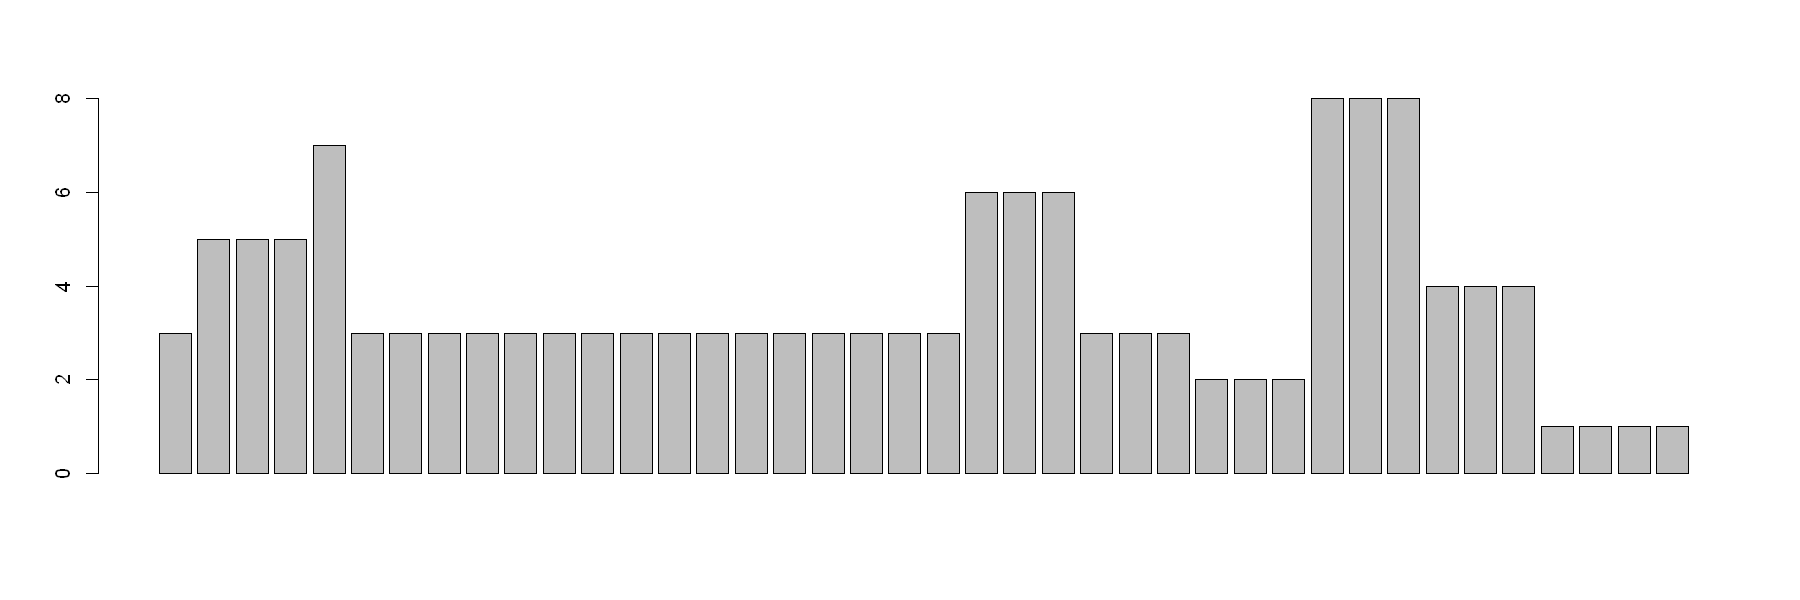

In [261]:
names(test)[percentage_missing_test !=0]
missing <- data.frame(cbind(names(test)[percentage_missing_test !=0],
                            percentage_missing_test[percentage_missing_test != 0]))
colnames(missing) <- c('Variable','Percentage Missing')
missing$`Percentage Missing` <- as.numeric(missing$`Percentage Missing`)

barplot(missing$`Percentage Missing`)

### Missing Value Treatment

In [262]:
test <- as.data.frame(test)
vect <- names(which(sapply(test,is.numeric)))
vect1<-sapply(test[,vect],function(y) mean(y,na.rm=T))
name<-names(vect1)
for (i in 1:length(vect1)){
  test[which(is.na(test[,name[i]])),name[i]]<-vect1[i]
}
test <- as.data.table(test)

which(test$build_year <= 0)
test$build_year[which(test$build_year <= 0)] <- median(test$build_year)

[1]    4    6   11   13   27   29   32   37   41   42   44   45   47   54
  [15]   62   67   74   76   78   79   83   93   98  100  105  113  121  124
  [29]  125  129  130  132  135  137  140  141  147  151  155  159  162  164
  [43]  168  171  174  175  179  182  189  195  199  205  210  214  215  217
  [57]  222  228  230  231  233  236  238  239  243  246  249  250  251  254
  [71]  255  258  261  263  267  268  270  271  275  277  279  280  290  291
  [85]  298  301  304  308  318  319  320  324  330  331  333  335  336  344
  [99]  350  351  354  357  361  363  371  373  376  380  382  384  388  390
 [113]  392  413  423  425  426  427  430  435  436  448  453  462  463  467
 [127]  470  478  481  495  503  504  509  513  532  533  535  540  544  546
 [141]  547  548  550  552  558  565  566  568  569  572  580  583  584  586
 [155]  588  589  601  607  608  610  611  612  613  617  626  637  646  648
 [169]  657  664  669  670  679  688  689  693  694  705  707  708  709  714
 [183]  716  720  726  729  741  747  750  754  756  757  758  759  760  761
 [197]  765  768  770  776  777  784  786  788  791  805  806  809  812  814
 [211]  817  821  823  824  825  826  831  833  834  841  842  846  848  855
 [225]  857  862  865  868  872  877  882  883  885  886  889  896  899  901
 [239]  903  911  913  915  924  925  927  928  932  934  936  942  947  950
 [253]  954  963  964  973  979  980  985  993 1012 1015 1024 1032 1035 1038
 [267] 1051 1053 1060 1066 1067 1073 1082 1083 1085 1087 1092 1096 1097 1099
 [281] 1104 1105 1112 1113 1116 1121 1123 1125 1131 1141 1142 1145 1154 1155
 [295] 1157 1165 1175 1182 1191 1195 1207 1208 1210 1211 1215 1217 1219 1224
 [309] 1234 1236 1248 1252 1262 1269 1272 1283 1289 1290 1291 1297 1301 1314
 [323] 1319 1325 1326 1337 1360 1377 1378 1380 1381 1387 1388 1391 1397 1399
 [337] 1400 1402 1405 1408 1417 1423 1426 1430 1439 1446 1448 1453 1471 1475
 [351] 1481 1487 1494 1505 1510 1514 1517 1528 1534 1543 1561 1563 1569 1576
 [365] 1578 1582 1584 1585 1589 1610 1624 1630 1632 1645 1646 1648 1655 1658
 [379] 1660 1665 1678 1682 1685 1692 1693 1701 1711 1715 1718 1719 1722 1725
 [393] 1734 1744 1747 1748 1754 1757 1765 1774 1779 1780 1786 1794 1799 1803
 [407] 1807 1816 1818 1821 1844 1845 1847 1852 1860 1863 1886 1889 1894 1899
 [421] 1913 1914 1916 1917 1920 1923 1928 1933 1938 1939 1943 1944 1948 1957
 [435] 1960 1972 1973 1976 1980 1992 1993 1998 2002 2003 2010 2012 2019 2027
 [449] 2028 2032 2039 2042 2054 2060 2061 2064 2066 2075 2085 2092 2093 2094
 [463] 2095 2096 2100 2111 2115 2120 2122 2123 2125 2126 2128 2132 2136 2139
 [477] 2151 2165 2174 2182 2183 2186 2187 2196 2203 2219 2241 2267 2314 2331
 [491] 2359 2360 2368 2369 2376 2382 2385 2395 2403 2412 2415 2418 2424 2434
 [505] 2442 2445 2471 2485 2486 2489 2490 2493 2518 2526 2539 2551 2555 2570
 [519] 2573 2574 2590 2596 2597 2601 2619 2630 2647 2651 2656 2670 2673 2684
 [533] 2706 2711 2748 2755 2772 2780 2784 2787 2797 2801 2805 2817 2835 2844
 [547] 2851 2859 2869 2881 2885 2908 2931 2934 2936 2947 2961 2974 2993 2995
 [561] 3008 3011 3015 3022 3033 3069 3079 3084 3100 3102 3108 3116 3117 3138
 [575] 3145 3150 3167 3170 3171 3177 3183 3203 3223 3228 3234 3246 3247 3248
 [589] 3253 3259 3262 3267 3268 3282 3311 3321 3335 3354 3355 3358 3359 3365
 [603] 3379 3380 3399 3402 3410 3412 3414 3436 3439 3443 3454 3492 3499 3522
 [617] 3525 3531 3534 3539 3545 3557 3561 3562 3579 3587 3589 3604 3606 3611
 [631] 3628 3642 3649 3656 3686 3691 3695 3708 3746 3770 3779 3780 3781 3786
 [645] 3804 3805 3829 3831 3838 3846 3848 3856 3873 3884 3888 3890 3908 3917
 [659] 3921 3925 3933 3934 3943 3948 3964 3974 3980 3986 3998 4014 4027 4033
 [673] 4055 4056 4064 4069 4072 4074 4101 4110 4122 4130 4132 4143 4152 4153
 [687] 4157 4176 4181 4184 4193 4194 4199 4212 4237 4238 4240 4250 4257 4263
 [701] 4273 4279 4280 4287 4288 4291 4293 4294 4296 4301 4319 4329 4332 4334
 [715] 4338 4347 4352 4353 4359 4387 4392 4395 4402 4403 4410 4418 4424 4455

### Prediction Model

In [263]:
model_01 <- lm(log(price_doc) ~ .,data=fdata_sberbank)

In [264]:
summary(model_01)


Call:
lm(formula = log(price_doc) ~ ., data = fdata_sberbank)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3654 -0.0681  0.1256  0.2751  1.3607 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            1.522e+01  5.023e-02 302.976  < 2e-16
life_sq                                4.740e-03  4.350e-04  10.897  < 2e-16
floor1                                -1.728e-01  1.902e-02  -9.089  < 2e-16
floor2                                -9.343e-02  1.674e-02  -5.583 2.41e-08
floor3                                -6.753e-02  1.651e-02  -4.090 4.35e-05
floor4                                -5.919e-02  1.734e-02  -3.413 0.000645
floor5                                -9.065e-02  1.708e-02  -5.306 1.14e-07
floor6                                -2.070e-02  1.918e-02  -1.079 0.280678
floor7                                -2.928e-02  1.864e-02  -1.571 0.116268
floor8                                 1.861e-03  1.953e-0

In [265]:
prediction <- predict(model_01, test)

In [267]:
head(prediction)

1        2        3        4        5        6 
15.42147 15.83613 15.65738 16.21142 15.44871 15.59506

In [268]:
prediction <- as.data.frame(prediction,header=T)

In [269]:
head(prediction)

prediction
15.42147
15.83613
15.65738
16.21142
15.44871
15.59506


In [270]:
prediction <- exp(prediction)
head(prediction)

prediction
4982633
7543023
6308351
10978222
5120206
5927195


In [271]:
predicted_prices <- prediction$prediction
predicted_prices

[1] 4.982633e+06 7.543023e+06 6.308351e+06 1.097822e+07 5.120206e+06
   [6] 5.927195e+06 4.825151e+06 4.086568e+06 5.337175e+06 5.146762e+06
  [11] 6.070819e+06 4.972817e+06 4.720856e+06 4.544208e+06 5.223917e+06
  [16] 5.520852e+06 1.053553e+07 1.419445e+07 5.879067e+06 8.468040e+06
  [21] 7.328494e+06 8.131618e+06 7.663900e+06 8.942975e+06 5.788534e+06
  [26] 8.492590e+06 8.261836e+06 7.073781e+06 5.372678e+06 5.700414e+06
  [31] 5.169215e+06 1.390428e+07 3.301799e+06 4.785651e+06 5.428126e+06
  [36] 6.574588e+06 7.386664e+06 5.640846e+06 6.084816e+06 5.112607e+06
  [41] 2.888521e+06 7.302564e+06 5.819266e+06 9.086676e+06 5.101167e+06
  [46] 4.917542e+06 5.477219e+06 5.409389e+06 4.660130e+06 5.761119e+06
  [51] 7.074593e+06 7.413630e+06 4.751958e+06 5.289241e+06 6.265755e+06
  [56] 6.396011e+06 6.182100e+06 1.081136e+07 4.884468e+06 9.069512e+06
  [61] 6.793354e+06 7.712999e+06 6.046462e+06 8.218495e+06 4.762919e+06
  [66] 9.823585e+06 8.085987e+06 8.392287e+06 2.795384e+06 5.391177e+06
  [71] 7.665100e+06 6.699224e+06 4.241206e+06 6.203336e+06 4.866397e+06
  [76] 4.336744e+06 1.029620e+07 5.313208e+06 2.713543e+06 6.730301e+06
  [81] 1.073558e+07 5.953760e+06 7.476123e+06 7.837632e+06 1.027654e+07
  [86] 3.797251e+06 4.410317e+06 6.251228e+06 6.931785e+06 7.130162e+06
  [91] 6.135991e+06 7.689936e+06 7.052034e+06 2.811533e+06 9.329707e+06
  [96] 7.178545e+06 5.895284e+06 7.177724e+06 4.984869e+06 5.744197e+06
 [101] 5.695958e+06 5.986761e+06 5.744232e+06 4.302743e+06 3.524918e+06
 [106] 6.880147e+06 4.423470e+06 4.172958e+06 8.423117e+06 6.101784e+06
 [111] 4.523457e+06 4.067266e+06 9.291829e+06 5.344252e+06 5.462365e+06
 [116] 6.612335e+06 9.268164e+06 4.512142e+06 6.238841e+06 9.969292e+06
 [121] 9.823585e+06 4.249240e+06 3.729780e+06 5.859676e+06 7.462901e+06
 [126] 1.038484e+07 9.982641e+06 6.718748e+06 2.744601e+06 1.050147e+07
 [131] 3.316584e+06 5.855967e+06 3.782203e+06 5.983417e+06 7.347099e+06
 [136] 5.531135e+06 6.501308e+06 5.896524e+06 5.972612e+06 1.159966e+07
 [141] 1.325440e+07 7.702007e+06 5.953760e+06 7.252273e+06 5.321724e+06
 [146] 7.495270e+06 4.076549e+06 6.162926e+06 1.087498e+07 5.419220e+06
 [151] 7.331742e+06 5.065434e+06 6.697046e+06 9.018808e+06 5.516868e+06
 [156] 5.373479e+06 7.057531e+06 5.888590e+06 4.385198e+06 4.512420e+06
 [161] 8.908456e+06 7.844439e+06 5.054706e+06 7.858357e+06 4.055850e+06
 [166] 6.314430e+06 4.256685e+06 1.032152e+07 5.115067e+06 8.205776e+06
 [171] 7.462901e+06 6.544865e+06 4.597270e+06 5.854082e+06 3.354781e+06
 [176] 3.612298e+06 3.451718e+06 3.301799e+06 4.832660e+06 6.695051e+06
 [181] 5.088586e+06 1.050715e+07 4.733983e+06 6.246449e+06 4.842439e+06
 [186] 4.160151e+06 7.224244e+06 5.734267e+06 6.408818e+06 1.113926e+07
 [191] 1.147887e+07 5.841269e+06 2.896945e+06 4.942898e+06 5.384829e+06
 [196] 6.863899e+06 3.936906e+06 6.343368e+06 1.173288e+07 9.319131e+06
 [201] 8.386136e+06 2.835318e+06 5.697647e+06 4.222008e+06 8.467529e+06
 [206] 5.827930e+06 7.104966e+06 4.554088e+06 6.880082e+06 8.032590e+06
 [211] 6.766846e+06 5.707338e+06 6.876080e+06 5.607616e+06 4.334537e+06
 [216] 8.177471e+06 3.386739e+06 4.475215e+06 6.267032e+06 8.294837e+06
 [221] 4.387240e+06 6.037921e+06 6.465692e+06 6.790850e+06 6.210044e+06
 [226] 5.121670e+06 4.954325e+06 7.859049e+06 5.738833e+06 5.103862e+06
 [231] 7.736649e+06 5.895537e+06 3.720531e+06 3.874022e+06 9.865423e+06
 [236] 5.494820e+06 7.290734e+06 6.687248e+06 4.279249e+06 5.094915e+06
 [241] 5.382711e+06 5.619295e+06 7.956794e+06 4.306291e+06 2.355140e+06
 [246] 1.677862e+07 6.814117e+06 5.203045e+06 8.031867e+06 5.958228e+06
 [251] 9.031021e+06 6.157283e+06 8.390879e+06 7.444080e+06 5.138461e+06
 [256] 4.350121e+06 5.672234e+06 6.678463e+06 3.994536e+06 7.566155e+06
 [261] 6.055695e+06 5.680915e+06 1.048741e+07 5.560882e+06 4.316178e+06
 [266] 4.783161e+06 5.241508e+06 7.721604e+06 5.387186e+06 5.700252e+06
 [271] 7.679699e+06 5.806816e+06 6.109524e+06 1.834303e+07 1.234625e+07
 [276] 4.723940e+06 5.879408e+06 4.309162e+

In [272]:
submit <- data.frame('id' = submission$id, 'price_doc' = predicted_prices)
write.csv(submit,file="submission.csv",row.names = F)